<h1 style="text-align: center; font-family: 'Playfair Display', serif; color:#B02B4A">
  Unlocking Data Engineering Opportunities : A Salary Prediction Study  with Glassdoor Job Listings!
</h1>

<p style="text-align: center;">
  <img src="https://media1.thehungryjpeg.com/thumbs2/ori_4157969_p0ujorqee30cxltb8w2dbinoklkfrykqkyczbars_cartoon-businessmen-office-workers-with-laptop-in-different-situation.jpg" alt="Businessmen Cartoon">
</p>


<h3 style="text-align: center; font-family: 'Playfair Display', serif;">
   ANISHA KATIYAR
</h3>


# Table of Contents

1. [Introduction](#introduction)
2. [Part 1: Data Collection](#part-1-data-collection)
3. [Part 2: Data Cleaning](#part-2-data-cleaning)
4. [Part 3: Exploratory Data Analysis](#part-3-exploratory-data-analysis)
5. [Part 4: Full Model Implementation](#part-4-full-model-implementation)
6. [Part 5: Machine Learning](#part-5-machine-learning)
7. [Part 6: Visualizations](#part-6-visualizations)
8. [Part 7: Conclusions](#part-7-conclusions)
9. [Bibliography](#bibliography)

---

# Introduction

## The Goal & Project Overview :

The primary aim of this data science project is to explore the data engineering job market in the United States by analyzing job listings from Glassdoor. The project will identify the key skills, educational qualifications, and other qualifications that are most sought after by employers in this field. Additionally, the project will develop a predictive model to estimate salaries for data engineers based on various factors such as location, company industry and rating, education level, and experience. Through this analysis, the project aims to provide valuable insights into the trends and demands within the data engineering job market.

Another key objective is to create a tool that helps data scientists estimate their potential salaries by analyzing relevant job descriptions. This tool will assist in income negotiations by providing valuable data on salary ranges based on job requirements and skills.


# Part 3: Exploratory Data Analysis
(Insert content for exploratory data analysis here.)

# Part 4: Full Model Implementation
(Insert content for model implementation here.)

# Part 5: Machine Learning
(Insert content for machine learning here.)

# Part 6: Visualizations
(Insert content for visualizations here.)

# Part 7: Conclusions
(Insert conclusions here.)

# Bibliography
(Insert bibliography here.)


# Part 1: Data Collection

The project focused on collecting weekly job postings for data engineering roles from Glassdoor in the US. The scraped data included key details such as job titles, company names, locations, job descriptions, salary estimates, education requirements, and required skills. This information was saved in a CSV file named in the format "glassdoor-data-engineer-15.csv," where "15" represented the week the data was gathered. The file was stored locally in the "data/raw/" directory for further analysis.

To scrape the job postings from the previous week, Selenium was used. The resulting file, "glassdoor-data-engineer-15.csv," contained columns such as Company Name, Job Title, Salary Estimate, Job Description, Rating, Job Location, Company Size, Founded Date, Type of Ownership, Industry, and Sector.

---

A significant challenge during this process was dealing with duplicate job postings. Glassdoor’s site often rerendered previously scraped listings while navigating through pages, leading to redundancy in the data. To address this, a scheduler was implemented to run the script weekly, ensuring only fresh and non-duplicate job postings were collected.

However, due to the complexities of web scraping and to ensure a robust dataset, a pre-scraped dataset from Kaggle was used. Glassdoor employs measures such as JavaScript rendering, dynamic data loading, and anti-scraping techniques like CAPTCHAs and rate limiting, which required tools like Selenium, Playwright, or Puppeteer to handle dynamic content. Additionally, Glassdoor’s use of third-party APIs and potential IP blocking posed further obstacles.

Considering these difficulties, the pre-scraped dataset from Kaggle provided a clean and comprehensive collection of job postings, eliminating the challenges of direct scraping. This dataset was then utilized for analysis and modeling in the project.

---

### Why I chose this Dataset? 

I chose this dataset because, as a student in the data science field, data engineering is one of the key roles many of us aspire to pursue after graduation. However, this dataset is not only relevant to students but also valuable for experienced professionals in the industry. It offers insights into current market trends, skills, and qualifications required for data engineering roles, helping both new graduates and working professionals assess their potential. 

Additionally, for those looking to shift or transfer jobs, this analysis provides key information to align their qualifications with industry demands and better prepare for career transitions.

---

### Importing all Essential Libraries

In this section, the foundation for data processing and visualization is established by importing the necessary libraries. These libraries serve different purposes, from handling data to visualizing insights effectively:

In [1]:
# General Libraries
import os
import re
import datetime
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Natural Language Processing Libraries
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Scikit-learn Libraries for Data Preprocessing and Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor

# Set Seaborn style for plots
color = sns.color_palette()
sns.set_style('darkgrid')

In [2]:
import warnings
warnings.filterwarnings('ignore')

---

# Part 2: Data Cleaning

This section covers how the collected data was formatted into clean, usable dataframes.

### First, loading the data from the scraped csv files

The dataset names are composed of the week number of the year and the year they were scraped in. For example, 'glassdoor-data-engineer-19-2023' was scraped in the 19th week of 2023.

In [3]:
# Gathering Scraped Files
def load_datasets(dir_path):
    
    dfs = []
    # looping over each file in the directory
    for i, filename in enumerate(os.listdir(dir_path)):
        if filename.endswith('.csv'):  # checking if file has .csv extension
            file_path = os.path.join(dir_path, filename) 
            
            # reading the CSV file into a DataFrame and giving it a name
            df_name = f'df{i+1}'  # generating a name like 'df1', 'df2', etc.
            df = pd.read_csv(file_path)
            
            # adding the DataFrame to the list
            dfs.append((df_name, df))

    # concatenating all the DataFrames together
    df_list = [df for _, df in dfs]  # extracting just the DataFrames
    df = pd.concat(df_list, axis=0)

    return df

In [7]:
dir_path = "../data/raw/"
df = load_datasets(dir_path)
df.head(10)

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,company_founded,company_revenue
0,SourceMantra\n3.7,3.7,"Houston, TX",Data Engineer,"Hello,\nJob Title: Data Engineer\nLocation: Ho...",$67.50 /hr (est.),Unknown,Company - Public,Financial Services,Accounting & Tax,NaN,Unknown / Non-Applicable
1,Cloud Shift Technologies LLC\n5.0,5.0,"Columbus, OH",Data Engineer,"Data Engineer\nCleveland, Ohio\nVideo Intervie...",$52.00 /hr (est.),1 to 50 Employees,Company - Private,NaN,NaN,NaN,Unknown / Non-Applicable
2,Fortek IT Solutions USA,NaN,"Denver, NC",Data Engineer,JD:\nEngineer requirement:\n· Bachelor's degre...,$70.00 /hr (est.),NaN,NaN,NaN,NaN,NaN,NaN
3,Wiliot\n4.5,4.5,Remote,Data Engineer,Wiliot was founded by the team that invented o...,NaN,1 to 50 Employees,Company - Private,Information Technology,Computer Hardware Development,2017.0,Unknown / Non-Applicable
4,WCG\n3.2,3.2,"Princeton, NJ",Data & Analytics Engineer (Remote),Description and Requirements\nJOB SUMMARY:\n\n...,"$63,680 /yr (est.)",1001 to 5000 Employees,Company - Private,Pharmaceutical & Biotechnology,Biotech & Pharmaceuticals,NaN,$100 to $500 million (USD)
5,wiselinkglobal,NaN,"Plano, TX",Data Engineer,"Position: Data Engineer\nLocation: Plano, TX\n...","$100,000 /yr (est.)",NaN,NaN,NaN,NaN,NaN,NaN
6,Clairvoyant\n4.1,4.1,"Bethlehem, PA",Data Engineer,"Job type: Fulltime/W2\nLocation: Bethlehem, PA...",$82.50 /hr (est.),501 to 1000 Employees,Company - Private,Information Technology,Information Technology Support Services,2012.0,Unknown / Non-Applicable
7,MARVEL TECHNOLOGIES INC\n3.7,3.7,"Plano, TX",Data Engineer - Connected Technologies,Our client is seeking a Data Engineer - Connec...,$62.50 /hr (est.),51 to 200 Employees,Company - Private,Information Technology,Computer Hardware Development,NaN,$5 to $25 million (USD)
8,Datasys Software and Consulting Inc\n4.4,4.4,"Plano, TX",Data Engineer,"Data Engineer\nPlano, TX\nLong-term Contract\n...","$100,019 /yr (est.)",1 to 50 Employees,Company - Private,Information Technology,Information Technology Support Services,NaN,Unknown / Non-Applicable
9,AgileEngine\n5.0,5.0,Remote,Senior Data Engineer,Remote position for USA residents;\nWhat you w...,NaN,1001 to 5000 Employees,Company - Private,Information Technology,Enterprise Software & Network Solutions,2010.0,Unknown / Non-Applicable


In [8]:
df.shape

(4260, 12)

In [9]:
df.columns

Index(['company', 'company_rating', 'location', 'job_title', 'job_description',
       'salary_estimate', 'company_size', 'company_type', 'company_sector',
       'company_industry', 'company_founded', 'company_revenue'],
      dtype='object')


The dataset features such as company, location, job_title, and salary_estimate provide key insights into job market trends, role specifics, and salary predictions. 

Other attributes like company_rating, company_size, and company_industry help assess company characteristics that influence job opportunities and compensation.

---

### Next, let's drop the duplicated job listings from our dataset

Duplicate entries, particularly in job descriptions, are a common issue in scraped datasets. This problem arises when the same listing is rendered across different pages or weeks. To address this:

- The **drop_duplicates** method was used, specifying the **job_description** column as the unique identifier.
- This step ensures that every job posting in the dataset represents a distinct listing, avoiding skewed analysis caused by repetitive entries.

In [10]:
df = df.drop_duplicates(subset=['job_description'])
df.shape

(1553, 12)

So now, we can export this as a dataframe and save it as our dataset on Kaggle!

In [11]:
data_path = '../data/kaggle/'
df.to_csv(data_path + "glassdoor-data-engineer-kaggle.csv", index=False)

### Now, we checking for the Null Values!

In [13]:
df.isnull().sum()

company               4
company_rating      198
location              1
job_title             1
job_description       1
salary_estimate     277
company_size        113
company_type        113
company_sector      294
company_industry    294
company_founded     423
company_revenue     113
dtype: int64

Hence, we drop rows with critical missing values. The most important column is "company" because if it's null, it indicates that the job posting wasn't successfully scraped, and consequently, most other columns would also be null. Therefore, we drop any rows where the "company" column is null.

---

In [14]:
df = df.dropna(subset=['company'])

In [15]:
df.isnull().sum()

company               0
company_rating      194
location              0
job_title             0
job_description       0
salary_estimate     276
company_size        112
company_type        112
company_sector      293
company_industry    293
company_founded     422
company_revenue     112
dtype: int64

### Moving On, we clean the Company Name by Removing the Associated Rating

In [19]:
# Before Removing
df.head(3)

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,company_founded,company_revenue
0,SourceMantra,3.7,"Houston, TX",Data Engineer,"Hello,\nJob Title: Data Engineer\nLocation: Ho...",$67.50 /hr (est.),Unknown,Company - Public,Financial Services,Accounting & Tax,NaN,Unknown / Non-Applicable
1,Cloud Shift Technologies LLC,5.0,"Columbus, OH",Data Engineer,"Data Engineer\nCleveland, Ohio\nVideo Intervie...",$52.00 /hr (est.),1 to 50 Employees,Company - Private,NaN,NaN,NaN,Unknown / Non-Applicable
2,Fortek IT Solutions USA,NaN,"Denver, NC",Data Engineer,JD:\nEngineer requirement:\n· Bachelor's degre...,$70.00 /hr (est.),NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# After Removing
df['company'] = df['company'].apply(lambda x: x.split('\n')[0].strip())
df.head(3)

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,company_founded,company_revenue
0,SourceMantra,3.7,"Houston, TX",Data Engineer,"Hello,\nJob Title: Data Engineer\nLocation: Ho...",$67.50 /hr (est.),Unknown,Company - Public,Financial Services,Accounting & Tax,NaN,Unknown / Non-Applicable
1,Cloud Shift Technologies LLC,5.0,"Columbus, OH",Data Engineer,"Data Engineer\nCleveland, Ohio\nVideo Intervie...",$52.00 /hr (est.),1 to 50 Employees,Company - Private,NaN,NaN,NaN,Unknown / Non-Applicable
2,Fortek IT Solutions USA,NaN,"Denver, NC",Data Engineer,JD:\nEngineer requirement:\n· Bachelor's degre...,$70.00 /hr (est.),NaN,NaN,NaN,NaN,NaN,NaN


### Next, we Correctly format the Salary Estimate, and Convert the Hourly to Annually!

The Salary data was inconsistent, including hourly and annual figures. 

So, a function was written to:
- Identify hourly rates and convert them to annual salaries using a multiplier of 1800 (assuming full-time work).
- Parse and retain valid annual salaries.
- Cleaned salaries were rounded and converted to integers for uniformity.
---

In [21]:
def clean_salary(salary_string):

    if pd.isnull(salary_string):
        return np.nan
    else:
        match_year = re.search(r'\$(\d{1,3},?\d{0,3},?\d{0,3}) \/yr \(est.\)', salary_string)
        match_hour = re.search(r'\$(\d+(\.\d+)?) \/hr \(est.\)', salary_string)

        if match_year:
            salary_amount = float(match_year.group(1).replace(',', ''))
        elif match_hour:
            hourly_salary = float(match_hour.group(1))
            salary_amount = hourly_salary * 1800
        else:
            salary_amount = np.nan

        return salary_amount

In [22]:
df['salary_estimate'] = df['salary_estimate'].apply(clean_salary)

In [23]:
df['salary_estimate'].head()

0    121500.0
1     93600.0
2    126000.0
3         NaN
4     63680.0
Name: salary_estimate, dtype: float64

### Now let's replace the null salary estimates with the mean

In [24]:
df['salary_estimate'].fillna(df['salary_estimate'].mean(), inplace=True)

### Let's round the clean salary estimate

In [27]:
df['salary_estimate'] = df['salary_estimate'].round().astype(int)
df.head(3)

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,company_founded,company_revenue
0,SourceMantra,3.7,"Houston, TX",Data Engineer,"Hello,\nJob Title: Data Engineer\nLocation: Ho...",121500,Unknown,Company - Public,Financial Services,Accounting & Tax,NaN,Unknown / Non-Applicable
1,Cloud Shift Technologies LLC,5.0,"Columbus, OH",Data Engineer,"Data Engineer\nCleveland, Ohio\nVideo Intervie...",93600,1 to 50 Employees,Company - Private,NaN,NaN,NaN,Unknown / Non-Applicable
2,Fortek IT Solutions USA,NaN,"Denver, NC",Data Engineer,JD:\nEngineer requirement:\n· Bachelor's degre...,126000,NaN,NaN,NaN,NaN,NaN,NaN


### Then, we Extract the State from the Job Location

In [28]:
df['location'] = df['location'].astype(str)
df['job_state'] = df['location'].apply(lambda x: x if x.lower() == 'remote' else x.split(', ')[-1])

In [29]:
df.job_state.value_counts()

Remote           233
CA               166
TX               157
VA                77
United States     58
                ... 
Missouri           1
HI                 1
NH                 1
Rhode Island       1
Florida            1
Name: job_state, Length: 67, dtype: int64

### Following which, we Replace the 'United States' in job_state with the most common state

In [30]:
common_states = df.job_state.value_counts().index.tolist()
common_state = next((state for state in common_states if state != 'Remote'), None)
common_state

'CA'

In [31]:
df['job_state']= df['job_state'].replace('United States', common_state)
df.job_state.value_counts()

Remote              233
CA                  224
TX                  157
VA                   77
NY                   57
                   ... 
Colorado              1
Massachusetts         1
Washington State      1
Missouri              1
Florida               1
Name: job_state, Length: 66, dtype: int64

### Subsequently, we Replace the Company Rating Null values with Median!

In [32]:
cr_median = df.company_rating.mean()
cr_median = round(cr_median, 1)
cr_median

3.9

In [33]:
df['company_rating'] = df['company_rating'].fillna(cr_median)

### Proceeding, we Add a new column that contains the Age of the Company

In [34]:
df['company_founded'] = df['company_founded'].fillna(-1)
df['company_founded'] = df['company_founded'].astype(int)

In [35]:
today = datetime.datetime.now()

df['company_age'] = df.company_founded.apply(lambda x: x if x < 0 else today.year - x)
df['company_age'].head()

0   -1
1   -1
2   -1
3    7
4   -1
Name: company_age, dtype: int64

### At this point, we Simplify the Job Title!

By grouping similar roles like "data scientist" or "data engineer" under common categories, we can better understand trends and demand for specific positions.

In [36]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    else:
        return 'na'

The title_simplifier function is designed to group similar job roles under common categories like "data scientist," "data engineer," "data analyst," or "machine learning engineer (MLE)." 

This helps in reducing the variability in job titles that might differ slightly in wording but essentially represent the same role.

---

In [37]:
df['job_simp'] = df['job_title'].apply(title_simplifier)

df.job_simp.value_counts()

data engineer     1109
na                 413
mle                 10
data analyst         9
data scientist       8
Name: job_simp, dtype: int64

In [38]:
df = df[df['job_simp'] == 'data engineer']

df.job_simp.value_counts()

data engineer    1109
Name: job_simp, dtype: int64

### The **Seniority** function 
Is used to classify job roles into categories like "senior," "junior," or "na" (not applicable). This allows us to analyze job opportunities based on experience levels, which can provide insights into whether the job market leans more toward senior or junior positions.

In [40]:
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    else:
        return 'na'

In [41]:
df['seniority'] = df['job_title'].apply(seniority)

df.seniority.value_counts()

na        758
senior    349
junior      2
Name: seniority, dtype: int64

In [42]:
df = df[df['seniority'] != "junior"]

df.seniority.value_counts()

na        758
senior    349
Name: seniority, dtype: int64

Here, we drop the "junior" entries from the dataset because there are very few "junior" roles, making them potentially unreliable for analysis. 

By focusing on "senior" and "na" categories, we can improve the quality of insights regarding job market trends and experience levels.

---

### Next, we Extract the Relevant Skills from the Job Description

This part of the process focuses on identifying and extracting relevant skills from the job descriptions. Key skill categories, such as programming languages, cloud tools, visualization tools, databases, big data technologies, data tools, and DevOps tools, are defined as lists of keywords.

In [ ]:
# #  Job description length 
# df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
# df['desc_len']

In [55]:
prog_languages = ['python', 'java', 'scala', 'go', 'r', 'c', 'c++', 'c#', 'sql', 'rust', 'bash']
cloud_tools = ['aws', 'azure', 'gcp']
viz_tools = ['power bi', 'tableau', 'excel', 'ssis', 'qlik', 'sap', 'looker']
databases = ['sql server', 'nosql', 'postgresql', 'mongodb', 'mysql', 'oracle', 'casandra', 'elasticsearch', 'dynamodb', 'snowflake', 'redis', 'neo4j', 'hive', 'databricks', 'redshift']
big_data = ['spark', 'hadoop', 'flink']
data_tools = ['airflow', 'kafka', 'dbt']
devops = ['gitlab', 'terraform', 'kubernetes', 'docker', 'jenkins', 'ansible']

Using the extract_keywords function, these keywords are matched within each job description, and the relevant skills are extracted and categorized into new columns.

In [56]:
def extract_keywords(description, keywords):
    pattern = r'\b(?:{})\b'.format('|'.join(map(re.escape, keywords)))
    matches = set(re.findall(pattern, description.lower(), flags=re.IGNORECASE))
    
    return list(matches)

In [57]:
df['job_languages'] = df['job_description'].apply(lambda x: extract_keywords(x, prog_languages))
df['job_cloud'] = df['job_description'].apply(lambda x: extract_keywords(x, cloud_tools))
df['job_viz'] = df['job_description'].apply(lambda x: extract_keywords(x, viz_tools))
df['job_databases'] = df['job_description'].apply(lambda x: extract_keywords(x, databases))
df['job_bigdata'] = df['job_description'].apply(lambda x: extract_keywords(x, big_data))
df['job_datatools'] = df['job_description'].apply(lambda x: extract_keywords(x, data_tools))
df['job_devops'] = df['job_description'].apply(lambda x: extract_keywords(x, devops))

For example, the job_datatools column contains tools like "airflow" or "kafka" if they are mentioned in the description. This makes it easier to analyze the demand for specific skills and technologies in data engineering roles

In [58]:
df['job_datatools']

0             [airflow]
1               [kafka]
2                    []
3               [kafka]
5      [airflow, kafka]
             ...       
176           [airflow]
240                  []
265                  []
320             [kafka]
388                  []
Name: job_datatools, Length: 1107, dtype: object

### Extracting Education from job description

In [59]:
education = ['associate', 'bachelor', 'master', 'phd']

The **extract_degree** function identifies and categorizes the required education levels, such as "associate," "bachelor," "master," or "PhD," by scanning job descriptions. This helps in understanding what degree levels are most commonly expected for data engineering roles.

In [60]:
def extract_degree(description, degrees):
    pattern = r'\b(?:{})\b'.format('|'.join(map(re.escape, degrees)))
    matches = re.findall(pattern, description.lower(), flags=re.IGNORECASE)
    
    if matches:
        return matches[0]
    
    return None

To focus on higher-level roles, associate degrees and PhDs are filtered out, leaving bachelor's and master's as the primary requirements for analysis.

In [61]:
df['job_education'] = df['job_description'].apply(lambda x: extract_degree(x, education))

df['job_education'].value_counts()

bachelor     481
master        77
associate     34
phd            8
Name: job_education, dtype: int64

In [62]:
df = df[df['job_education'] != "associate"]
df = df[df['job_education'] != "phd"]

df['job_education'].value_counts()

bachelor    481
master       77
Name: job_education, dtype: int64

### Let's extract the experience needed to apply for the job

The **extract_experience** function identifies experience requirements mentioned in job descriptions, grouping them into ranges like "0-2 years," "2-5 years," "5-10 years," and "+10 years." This provides insights into the level of expertise employers typically seek.

In [63]:
def extract_experience(description):
    pattern = r'(?:Experience level|experience|\+).*(?:\n.*)*(\d+|\+)\s*(?:year|years|\+ years|\+ years of experience)'
    matches = re.findall(pattern, description, flags=re.IGNORECASE)
    
    if matches:
        experience = matches[0]
        if experience == '+':
            return "+10 years"
        elif int(experience) < 2:
            return "0-2 years"
        elif int(experience) < 5:
            return "2-5 years"
        elif int(experience) < 10:
            return "5-10 years"
        else:
            return "+10 years"
        
    else:
        return None

In [64]:
df['job_experience'] = df['job_description'].apply(lambda x: extract_experience(x))

df['job_experience'].value_counts()

+10 years     282
5-10 years    169
2-5 years     142
0-2 years     137
Name: job_experience, dtype: int64

By extracting and organizing this information, the analysis can reveal trends in educational and experience expectations for data-related roles, making it easier for job seekers to align their qualifications with industry demands.

### Some job listings don't mention the education or years of experience needed.

In [65]:
df.head()

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,...,seniority,job_languages,job_cloud,job_viz,job_databases,job_bigdata,job_datatools,job_devops,job_education,job_experience
0,SourceMantra,3.7,"Houston, TX",Data Engineer,"Hello,\nJob Title: Data Engineer\nLocation: Ho...",121500,Unknown,Company - Public,Financial Services,Accounting & Tax,...,na,[python],[azure],[],[],[],[airflow],[kubernetes],None,0-2 years
1,Cloud Shift Technologies LLC,5.0,"Columbus, OH",Data Engineer,"Data Engineer\nCleveland, Ohio\nVideo Intervie...",93600,1 to 50 Employees,Company - Private,NaN,NaN,...,na,"[sql, python]",[],[tableau],[],"[spark, hadoop]",[kafka],[],bachelor,5-10 years
2,Fortek IT Solutions USA,3.9,"Denver, NC",Data Engineer,JD:\nEngineer requirement:\n· Bachelor's degre...,126000,NaN,NaN,NaN,NaN,...,na,"[sql, c]",[],"[tableau, power bi]",[snowflake],[],[],[],bachelor,0-2 years
3,Wiliot,4.5,Remote,Data Engineer,Wiliot was founded by the team that invented o...,115203,1 to 50 Employees,Company - Private,Information Technology,Computer Hardware Development,...,na,"[java, sql, scala, python]","[azure, aws, gcp]",[],"[databricks, nosql]",[spark],[kafka],[],bachelor,None
5,wiselinkglobal,3.9,"Plano, TX",Data Engineer,"Position: Data Engineer\nLocation: Plano, TX\n...",100000,NaN,NaN,NaN,NaN,...,na,"[sql, scala]",[aws],[tableau],"[redshift, snowflake]",[spark],"[airflow, kafka]",[],None,0-2 years


### Exporting the cleaned version of the dataframe as a new data file

In [73]:
data_path = '../data/processed/'

df.to_csv(data_path + "glassdoor-data-engineer-cleaned.csv", index=False)

In [71]:
df

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,...,seniority,job_languages,job_cloud,job_viz,job_databases,job_bigdata,job_datatools,job_devops,job_education,job_experience
0,SourceMantra,3.7,"Houston, TX",Data Engineer,"Hello,\nJob Title: Data Engineer\nLocation: Ho...",121500,Unknown,Company - Public,Financial Services,Accounting & Tax,...,na,[python],[azure],[],[],[],[airflow],[kubernetes],None,0-2 years
1,Cloud Shift Technologies LLC,5.0,"Columbus, OH",Data Engineer,"Data Engineer\nCleveland, Ohio\nVideo Intervie...",93600,1 to 50 Employees,Company - Private,NaN,NaN,...,na,"[sql, python]",[],[tableau],[],"[spark, hadoop]",[kafka],[],bachelor,5-10 years
2,Fortek IT Solutions USA,3.9,"Denver, NC",Data Engineer,JD:\nEngineer requirement:\n· Bachelor's degre...,126000,NaN,NaN,NaN,NaN,...,na,"[sql, c]",[],"[tableau, power bi]",[snowflake],[],[],[],bachelor,0-2 years
3,Wiliot,4.5,Remote,Data Engineer,Wiliot was founded by the team that invented o...,115203,1 to 50 Employees,Company - Private,Information Technology,Computer Hardware Development,...,na,"[java, sql, scala, python]","[azure, aws, gcp]",[],"[databricks, nosql]",[spark],[kafka],[],bachelor,None
5,wiselinkglobal,3.9,"Plano, TX",Data Engineer,"Position: Data Engineer\nLocation: Plano, TX\n...",100000,NaN,NaN,NaN,NaN,...,na,"[sql, scala]",[aws],[tableau],"[redshift, snowflake]",[spark],"[airflow, kafka]",[],None,0-2 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,Hashmap,3.4,"Mexico, MO",Data Engineer,"NTT DATA Services strives to hire exceptional,...",91506,10000+ Employees,Company - Public,Information Technology,Information Technology Support Services,...,na,"[sql, python]",[aws],[],[snowflake],[],[airflow],[],master,+10 years
240,Concentrix,4.0,Remote,Data Engineer Job Ref #: 795218,Job Title:\nData Engineer Job Ref #: 795218\nJ...,115203,10000+ Employees,Company - Public,Information Technology,Information Technology Support Services,...,na,[],[],[],[],[],[],[],None,None
265,ADT,3.1,"Boca Raton, FL",Data Engineer,Company Overview:\n\nADT has been in the busin...,109599,10000+ Employees,Company - Public,Management & Consulting,Security & Protective,...,na,[go],[],[],[],[],[],[],bachelor,0-2 years
320,Capital One,4.1,"Wilmington, DE",Senior Data Engineer,"802 Delaware Avenue (18052), United States of ...",115203,10000+ Employees,Company - Public,Financial Services,Banking & Lending,...,senior,"[python, java, sql, scala]","[azure, aws]",[],"[mysql, hive, snowflake, nosql, redshift]","[spark, hadoop]",[kafka],[],bachelor,+10 years


In [72]:
df.describe()

,company_rating,salary_estimate,company_founded,company_age
count,1065.000000,1065.000000,1065.000000,1065.000000
mean,3.923380,114261.966197,1373.215962,32.521127
std,0.518173,25341.073481,912.204166,49.350840
min,1.000000,48600.000000,-1.000000,-1.000000
25%,3.600000,97500.000000,-1.000000,-1.000000
50%,3.900000,115203.000000,1968.000000,15.000000
75%,4.200000,123004.000000,2005.000000,41.000000
max,5.000000,288000.000000,2022.000000,388.000000


## II. Exploratory Data Analysis

Exploratory Data Analysis (EDA) serves as the investigative phase, allowing us to understand the underlying patterns, distributions, and relationships in the data. The goal is to uncover insights and identify trends that inform further analysis and model building.

### Importing the Cleaned/Preprocessed Data Now

In [138]:
df = pd.read_csv("../data/processed/glassdoor-data-engineer-cleaned.csv")
df.head()

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,...,seniority,job_languages,job_cloud,job_viz,job_databases,job_bigdata,job_datatools,job_devops,job_education,job_experience
0,SourceMantra,3.7,"Houston, TX",Data Engineer,"Hello,\nJob Title: Data Engineer\nLocation: Ho...",121500,Unknown,Company - Public,Financial Services,Accounting & Tax,...,na,['python'],['azure'],[],[],[],['airflow'],['kubernetes'],NaN,0-2 years
1,Cloud Shift Technologies LLC,5.0,"Columbus, OH",Data Engineer,"Data Engineer\nCleveland, Ohio\nVideo Intervie...",93600,1 to 50 Employees,Company - Private,NaN,NaN,...,na,"['sql', 'python']",[],['tableau'],[],"['spark', 'hadoop']",['kafka'],[],bachelor,5-10 years
2,Fortek IT Solutions USA,3.9,"Denver, NC",Data Engineer,JD:\nEngineer requirement:\n· Bachelor's degre...,126000,NaN,NaN,NaN,NaN,...,na,"['sql', 'c']",[],"['tableau', 'power bi']",['snowflake'],[],[],[],bachelor,0-2 years
3,Wiliot,4.5,Remote,Data Engineer,Wiliot was founded by the team that invented o...,115203,1 to 50 Employees,Company - Private,Information Technology,Computer Hardware Development,...,na,"['java', 'sql', 'scala', 'python']","['azure', 'aws', 'gcp']",[],"['databricks', 'nosql']",['spark'],['kafka'],[],bachelor,NaN
4,wiselinkglobal,3.9,"Plano, TX",Data Engineer,"Position: Data Engineer\nLocation: Plano, TX\n...",100000,NaN,NaN,NaN,NaN,...,na,"['sql', 'scala']",['aws'],['tableau'],"['redshift', 'snowflake']",['spark'],"['airflow', 'kafka']",[],NaN,0-2 years


Here, we are attempting to safely convert the values in specific columns (job_languages, job_cloud, job_viz, job_databases, job_bigdata, etc.) from string representations back into their original data types, such as lists or other structures.

In [139]:
cols = ['job_languages', 'job_cloud', 'job_viz', 'job_databases', 'job_bigdata', 'job_datatools', 'job_devops']

The **safe_eval** function is used to evaluate these string representations, converting them to their intended format. If any value cannot be safely evaluated (e.g., due to an error), it is returned as-is. This step ensures the data in these columns can be processed and analyzed further in its correct format, rather than being limited by string representations.

In [140]:
def safe_eval(x):
    try:
        return eval(x)
    except:
        return x

In [141]:
df[cols] = df[cols].astype(str).applymap(safe_eval)

### Visualizing the most in demand tools for Data Engineers

Key tools and skills extracted from job descriptions were analyzed to identify trends.

In [142]:
prog_languages = ['python', 'java', 'scala', 'go', 'r', 'c', 'c++', 'c#', 'sql', 'rust', 'bash']
cloud_tools = ['aws', 'azure', 'gcp']
viz_tools = ['power bi', 'tableau', 'excel', 'ssis', 'qlik', 'sap', 'looker']
databases = ['sql server', 'nosql', 'postgresql', 'mongodb', 'mysql', 'oracle', 'casandra', 'elasticsearch', 'dynamodb', 'snowflake', 'redis', 'neo4j', 'hive', 'databricks', 'redshift']
big_data = ['spark', 'hadoop', 'flink']
data_tools = ['airflow', 'kafka', 'dbt']
devops = ['gitlab', 'terraform', 'kubernetes', 'docker', 'jenkins', 'ansible']

The function **filtered_keywords** counts keywords, calculates percentage and plots the results.

In [143]:
def filtered_keywords(tools, keywords, title, head=10):
    # getting the keywords in a column
    count_keywords = pd.DataFrame(tools.sum()).value_counts().rename_axis('keywords').reset_index(name='counts')
    
    # getting the frequency of occurrence of word (as word only appears once per line)
    length = len(tools) # number of job postings
    count_keywords['percentage'] = 100 * count_keywords.counts / length

    # plotting the results
    count_keywords = count_keywords[count_keywords.keywords.isin(keywords)]
    count_keywords = count_keywords.head(head)
    g = sns.barplot(x="keywords", y="percentage", data=count_keywords, palette="husl")
    
    plt.xlabel("")
    plt.ylabel("Likelihood to be in job posting (%)")
    plt.xticks(rotation = 45, ha='right')
    plt.title(title) 
    plt.show(g)
    print(count_keywords)
    
    

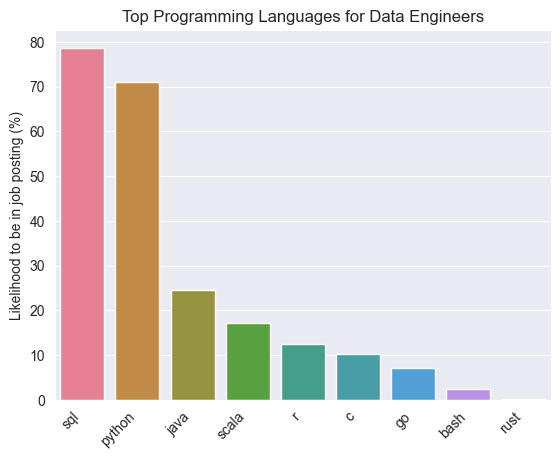

  keywords  counts  percentage
0      sql     838   78.685446
1   python     756   70.985915
2     java     262   24.600939
3    scala     182   17.089202
4        r     133   12.488263
5        c     110   10.328638
6       go      75    7.042254
7     bash      25    2.347418
8     rust       3    0.281690


In [144]:
filtered_keywords(df['job_languages'], prog_languages, title="Top Programming Languages for Data Engineers")

In programming languages, tools like **SQL**, **Python**, and **Java** dominated the listings, with visualizations highlighting their prevalence across job postings.

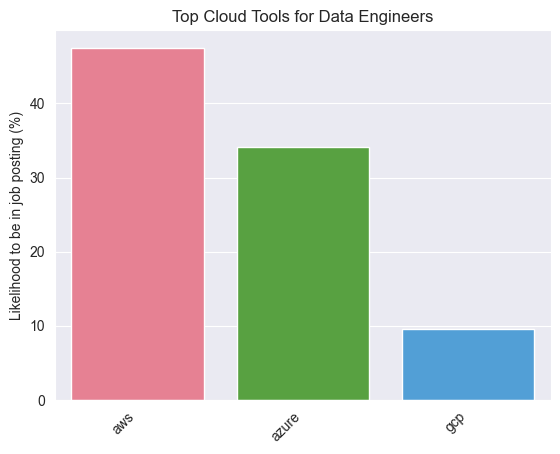

  keywords  counts  percentage
0      aws     506   47.511737
1    azure     363   34.084507
2      gcp     102    9.577465


In [145]:
filtered_keywords(df['job_cloud'], cloud_tools, title="Top Cloud Tools for Data Engineers")

Cloud services like **AWS**, **Azure**, and **GCP** were compared in terms of frequency, reflecting industry demand for cloud expertise.

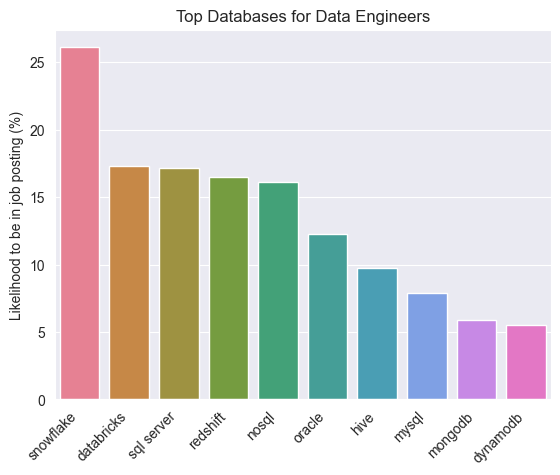

     keywords  counts  percentage
0   snowflake     278   26.103286
1  databricks     184   17.276995
2  sql server     183   17.183099
3    redshift     176   16.525822
4       nosql     172   16.150235
5      oracle     131   12.300469
6        hive     104    9.765258
7       mysql      84    7.887324
8     mongodb      63    5.915493
9    dynamodb      59    5.539906


In [146]:
filtered_keywords(df['job_databases'], databases, title="Top Databases for Data Engineers")

This chart shows the most commonly mentioned databases in job postings. **"Snowflake"**, **"Databricks,"** and **"SQL Server"** top the list, indicating high demand for these tools in the industry.

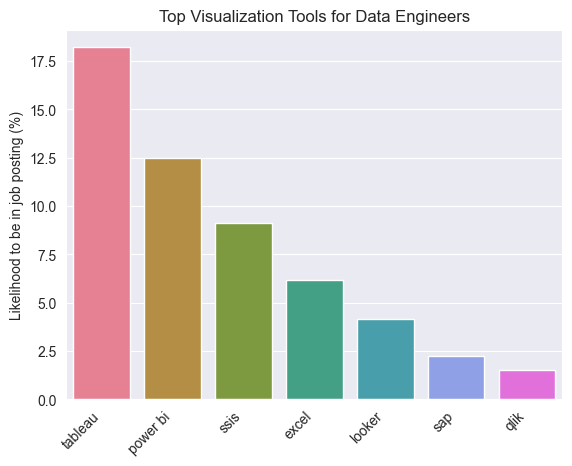

   keywords  counts  percentage
0   tableau     194   18.215962
1  power bi     133   12.488263
2      ssis      97    9.107981
3     excel      66    6.197183
4    looker      44    4.131455
5       sap      24    2.253521
6      qlik      16    1.502347


In [147]:
filtered_keywords(df['job_viz'], viz_tools, title="Top Visualization Tools for Data Engineers")

Tools like "**Tableau**" and "**Power BI**" are leading visualization tools required for data engineering roles, highlighting the need for proficiency in data visualization.

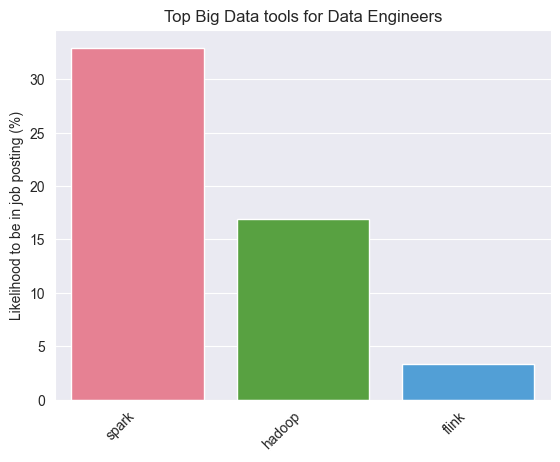

  keywords  counts  percentage
0    spark     351   32.957746
1   hadoop     180   16.901408
2    flink      35    3.286385


In [148]:
filtered_keywords(df['job_bigdata'], big_data, title="Top Big Data tools for Data Engineers")

"**Spark**" dominates the big data category, followed by "**Hadoop**" and "**Flink**," reflecting the industry's preference for these technologies.

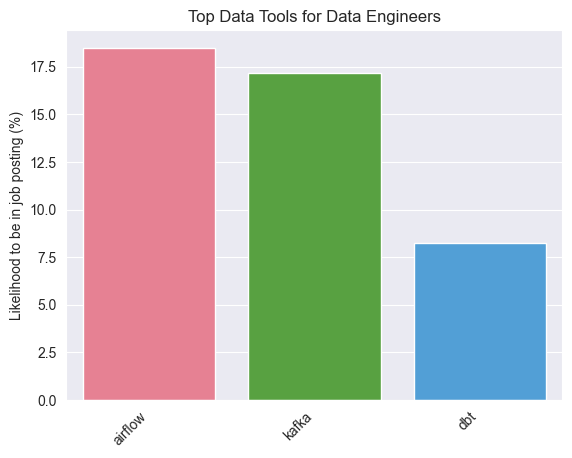

  keywords  counts  percentage
0  airflow     197   18.497653
1    kafka     183   17.183099
2      dbt      88    8.262911


In [149]:
filtered_keywords(df['job_datatools'], data_tools, title="Top Data Tools for Data Engineers")

Tools like "**Airflow**," "**Kafka**," and "**DBT**" are essential for managing and orchestrating data workflows, as shown in this chart.

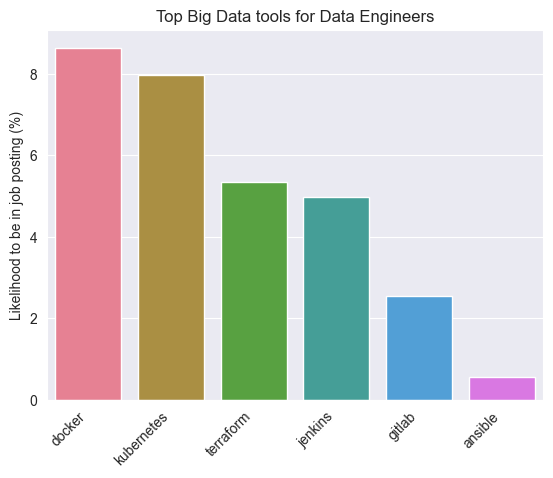

     keywords  counts  percentage
0      docker      92    8.638498
1  kubernetes      85    7.981221
2   terraform      57    5.352113
3     jenkins      53    4.976526
4      gitlab      27    2.535211
5     ansible       6    0.563380


In [150]:
filtered_keywords(df['job_devops'], devops, title="Top Big Data tools for Data Engineers")

"**Docker**" and "**Kubernetes**" are the most mentioned tools in the DevOps category, showcasing their importance in data engineering pipelines.


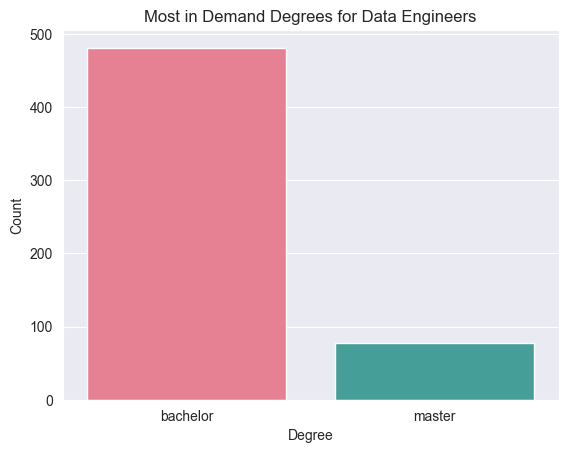

In [151]:
sns.countplot(data=df, x='job_education', palette="husl")

plt.title('Most in Demand Degrees for Data Engineers')
plt.xlabel('Degree')
plt.ylabel('Count')

plt.show()

This plot shows that a bachelor's degree is the most commonly required qualification for data engineering roles, followed by a master's.

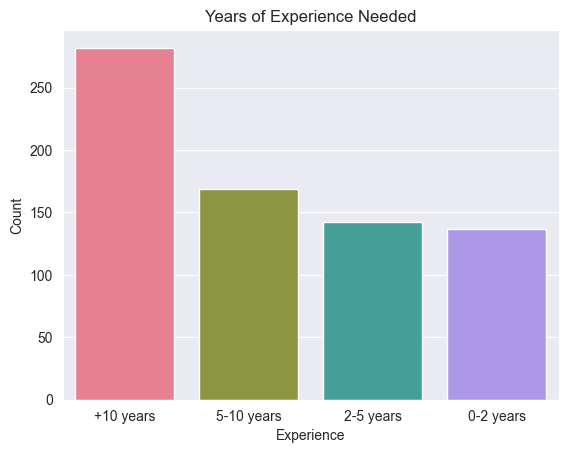

In [152]:
sns.countplot(data=df, x='job_experience', palette="husl", order = df['job_experience'].value_counts().index)

plt.title('Years of Experience Needed')
plt.xlabel('Experience')
plt.ylabel('Count')

plt.show()

Many positions require over 10 years of experience, but there are significant opportunities for those with 5-10 years and even 2-5 years of experience.

Companies that are recruiting Data Engineers the most in Glassdoor

In [153]:
# top10 = df['company'].value_counts().head(10)
# sns.countplot(x='company', order=top10.index, data=df, palette="husl")
# plt.title("Top 10 Companies Recruiting Data Engineers in Glassdoor (03/2023)")
# plt.xticks(rotation=90)
# plt.show()

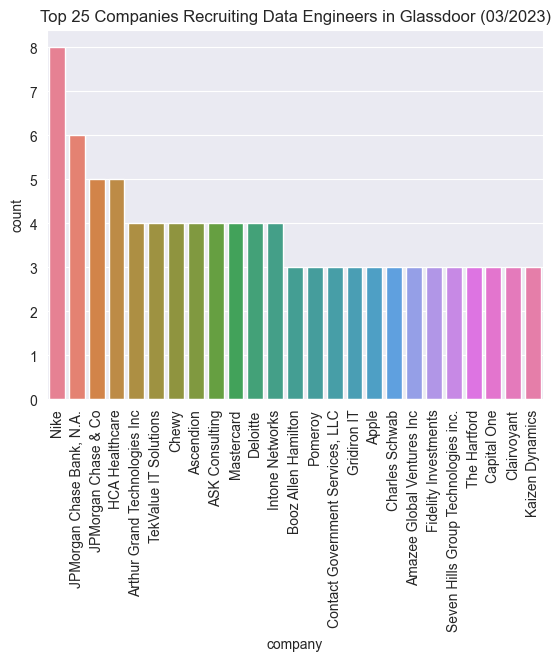

In [154]:
top25 = df['company'].value_counts().head(25)
sns.countplot(x='company', order=top25.index, data=df, palette="husl")
plt.title("Top 25 Companies Recruiting Data Engineers in Glassdoor (03/2023)")
plt.xticks(rotation=90)
plt.show()

The chart highlights companies like **Nike** and **Chase Bank** as leading recruiters for data engineers, reflecting the industries actively hiring.

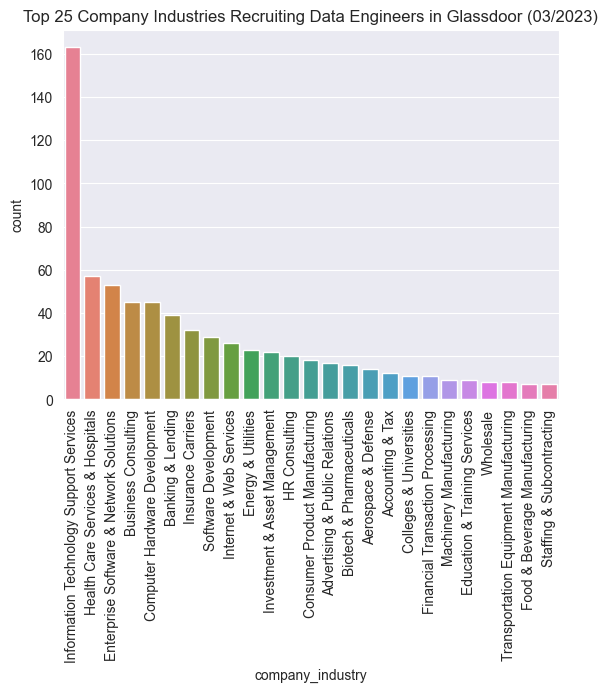

In [155]:
top25 = df['company_industry'].value_counts().head(25)
sns.countplot(x='company_industry', order=top25.index, data=df, palette="husl")
plt.title("Top 25 Company Industries Recruiting Data Engineers in Glassdoor (03/2023)")
plt.xticks(rotation=90)
plt.show()

The "**Information Technology Support Services**" and "**Health Care Services**" sectors lead the way, demonstrating strong demand for data engineers across various domains.

### Data Engineer salary in United States

How much does a Data Engineer make in the United States?

In [156]:
avg_salary = df['salary_estimate'].mean()
print(f"Average base salary : ${round(avg_salary):,} per year")

Average base salary : $114,262 per year


In [157]:
min_salary = df['salary_estimate'].min()
max_salary = df['salary_estimate'].max()

print(f"Lowest salary : ${round(min_salary)} -- Highest salary : ${round(max_salary)}")

Lowest salary : $48600 -- Highest salary : $288000


#### Salary estimate distribution

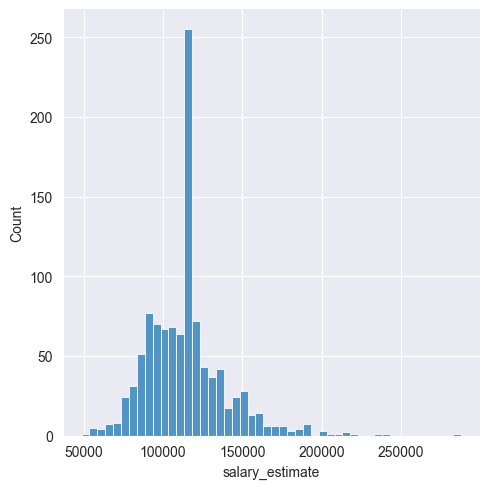

In [158]:
sns.displot(df['salary_estimate'])

The graph shows the distribution of salary estimates for data engineering roles. Most salaries are concentrated around 100,000, but there are a few higher salaries that stretch beyond $150,000.

<Axes: xlabel='company_rating', ylabel='Count'>

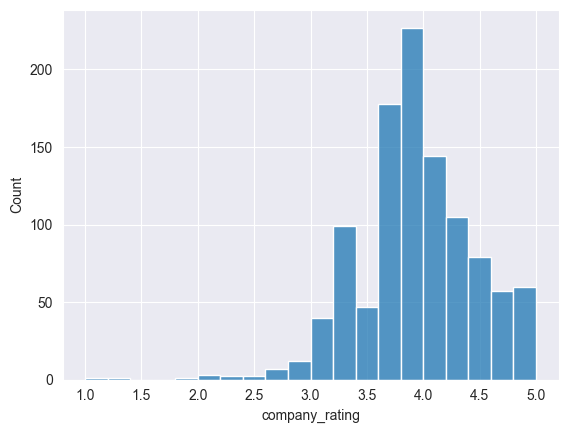

In [159]:
sns.histplot(df['company_rating'], bins=20)

The plot illustrates the distribution of company ratings. Many companies fall between a rating of 3.5 and 4.5, which indicates a majority of jobs are with companies that are well-rated by employees.

<Axes: xlabel='company_age', ylabel='Count'>

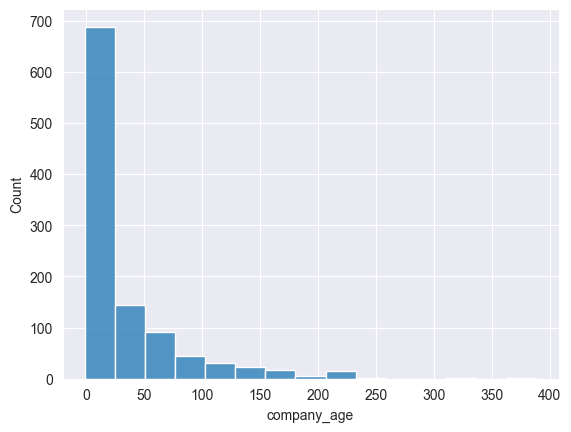

In [160]:
sns.histplot(df['company_age'], bins=15)

The chart highlights the ages of companies hiring data engineers. Most are younger companies (under 50 years old), but a few established companies with histories over 100 years also hire for these roles.

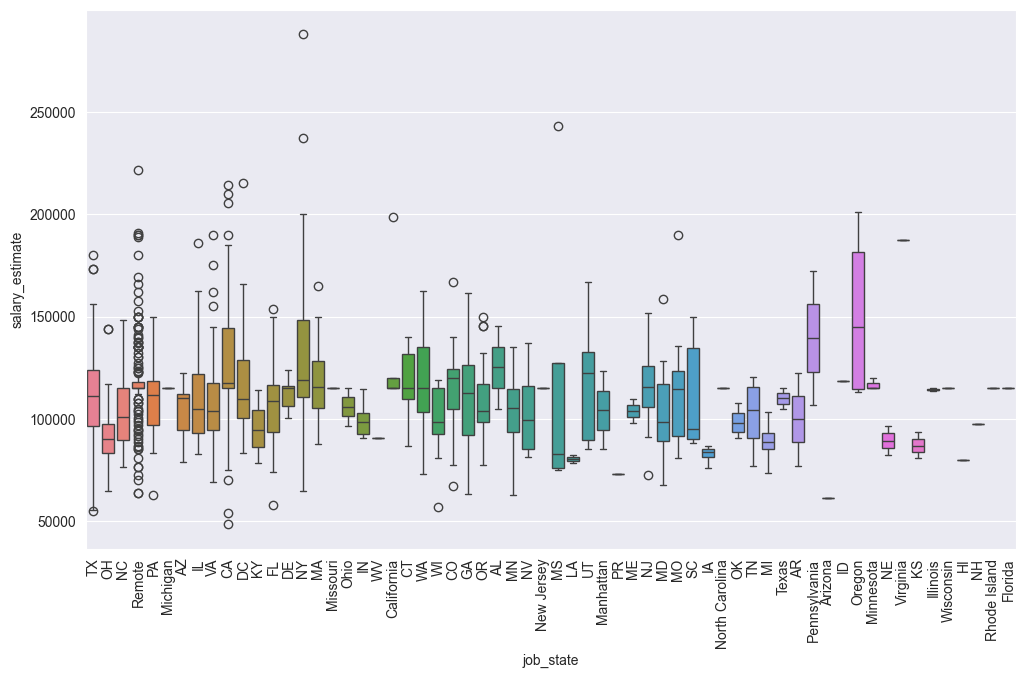

In [161]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))

sns.boxplot(data=df, x='job_state', y='salary_estimate', palette="husl")
plt.xticks(rotation=90)
plt.show()

The boxplot shows the range of salary estimates across different states. Some states, like California, have higher salary ranges, while others are lower. The outliers above the boxes represent roles with exceptionally high salaries.

### Getting rid of the outliers

- To clean the data, we calculate the interquartile range (IQR) and define a cutoff at $175,000 to filter out extreme outliers. This ensures the analysis is more reliable without heavily skewed results.

- A lower bound isn’t necessary since salaries below $60,000 are still relevant for entry-level roles and don’t distort the data.

In [162]:
Q1 = df['salary_estimate'].quantile(0.25)
Q3 = df['salary_estimate'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

In [166]:
upper_bound

161260.0

In [167]:
lower_bound

59244.0

In [168]:
df = df[df['salary_estimate'] <= 175000]

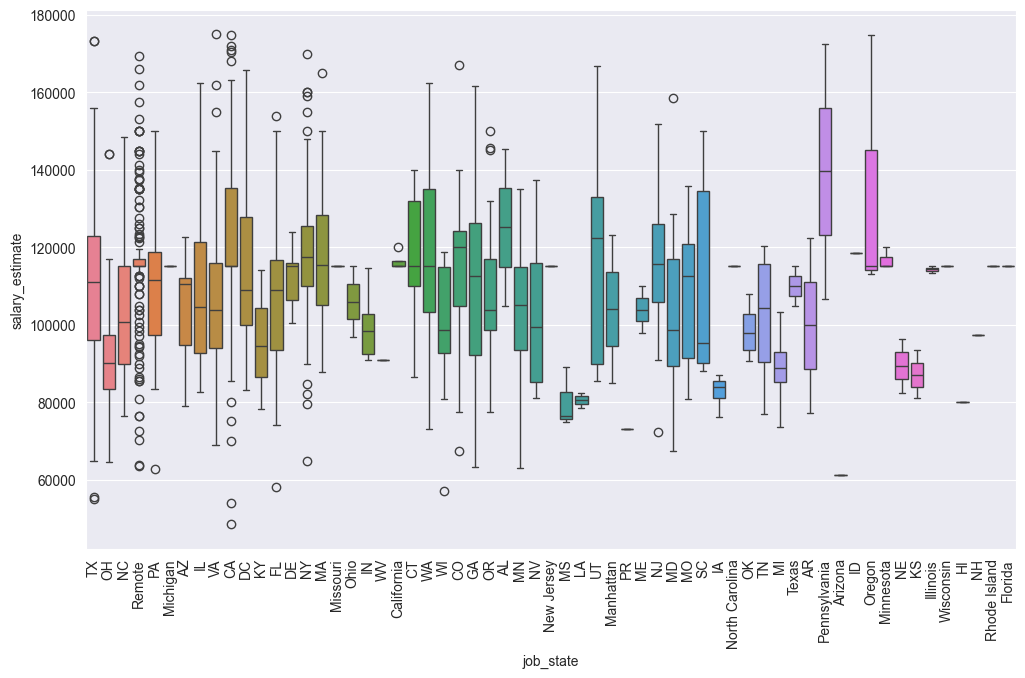

In [169]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))

sns.boxplot(data=df, x='job_state', y='salary_estimate', palette="husl")
plt.xticks(rotation=90)
plt.show()

After removing outliers, the updated boxplot presents a cleaner view of salary distributions across states, allowing for more meaningful comparisons.

In [170]:
df_cat = df[['job_state', 'seniority', 'company_revenue', 'company_age', 'company_industry', 'company_sector', 'company_type', 'company_size']]

graph for job_state: total = 61


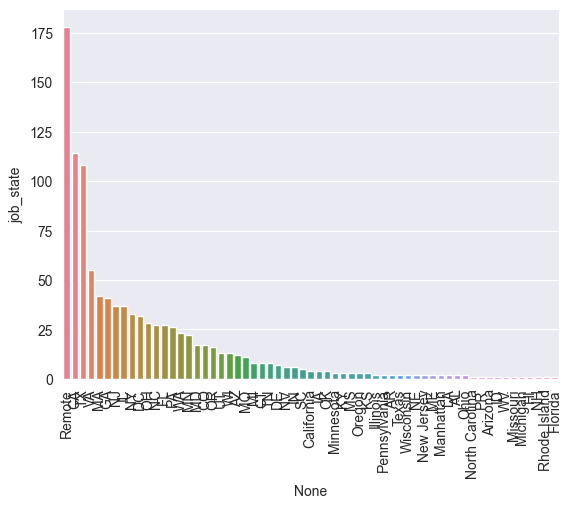

graph for seniority: total = 2


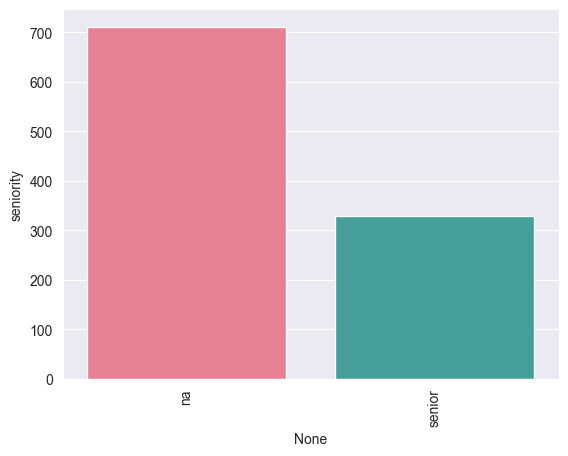

graph for company_revenue: total = 10


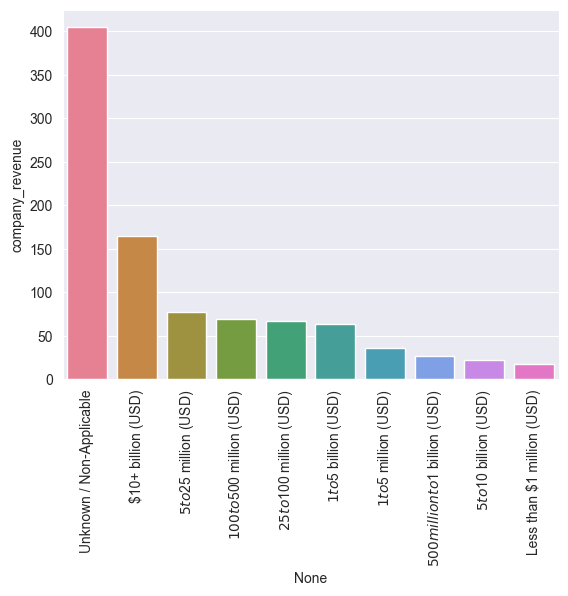

graph for company_age: total = 146


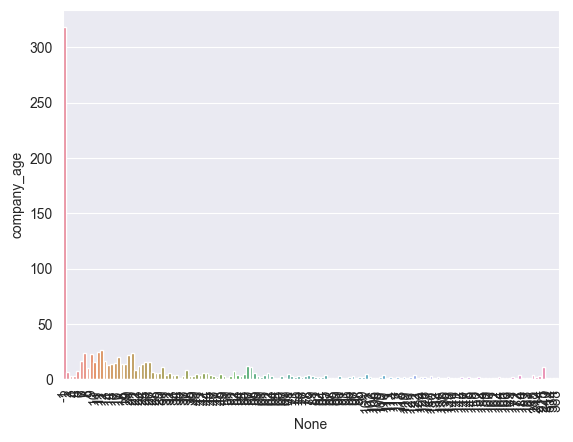

graph for company_industry: total = 79


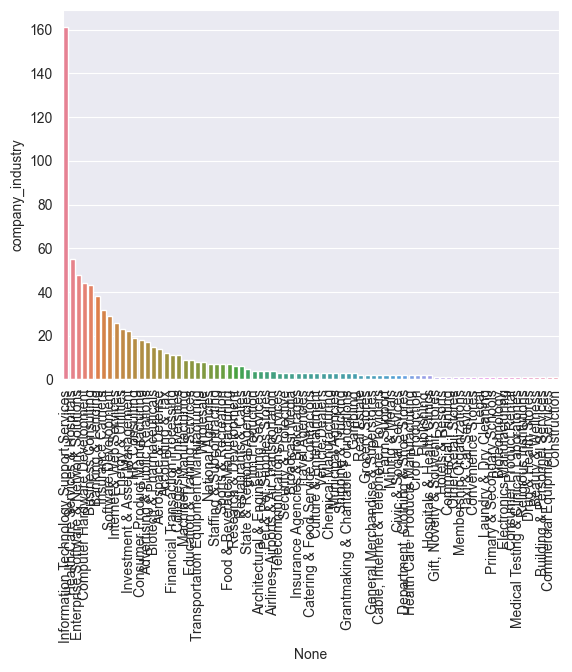

graph for company_sector: total = 25


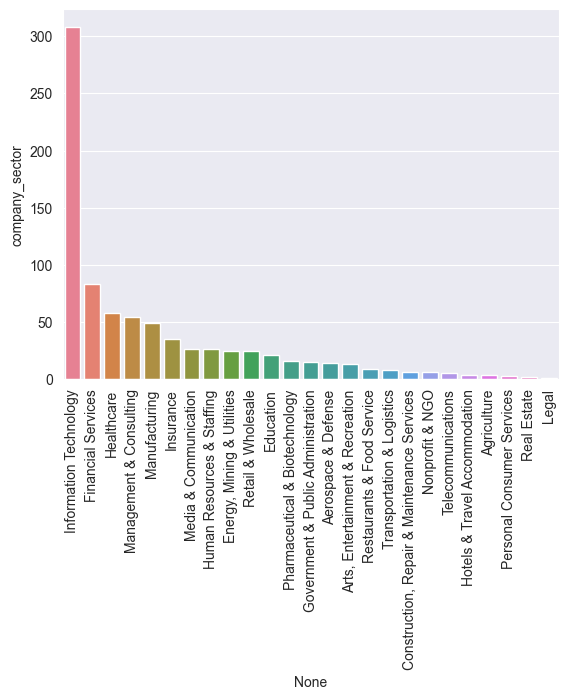

graph for company_type: total = 11


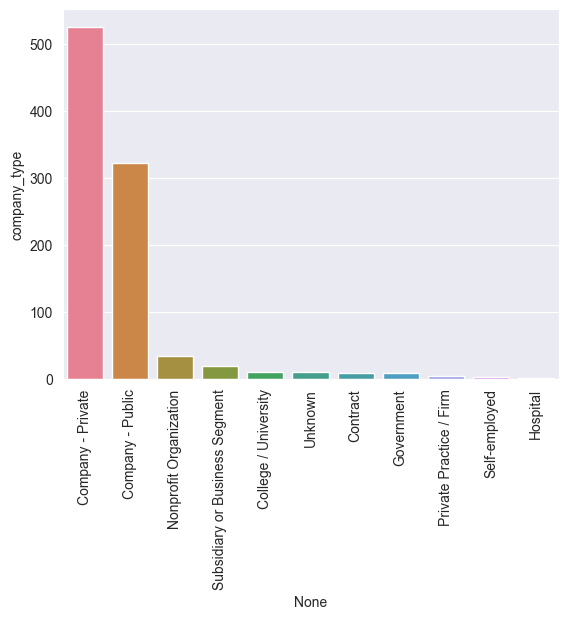

graph for company_size: total = 8


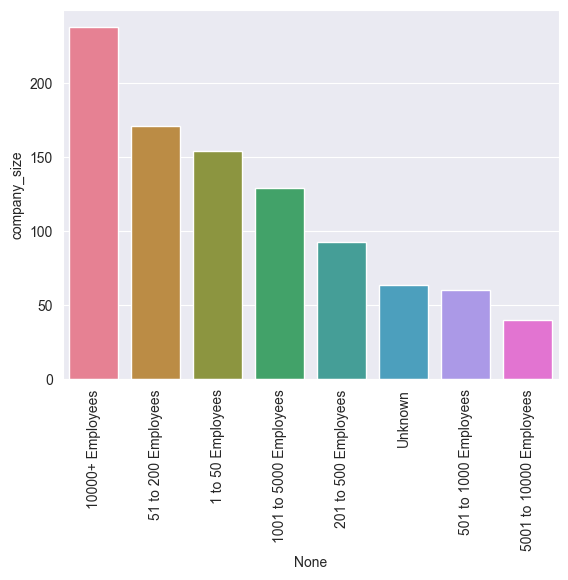

In [171]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num, palette="husl")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

**Job State Distribution**:
- This plot shows the distribution of job postings by location. Remote roles dominate the list, reflecting the flexibility of data engineering jobs. Other states like California and New York also have significant opportunities.

**Seniority Levels**:
- The majority of job postings do not specify seniority ("na"), but among the ones that do, senior-level roles are the most common. This shows the demand for experienced professionals.

**Company Revenue**:
- A large number of companies fall into the "unknown" revenue category, but among those with known revenues, most have revenues of over 10 billion dollars, showing that many postings come from well-established companies.

**Company Age**:
- Most companies hiring data engineers are relatively young, under 50 years old, though there are outliers with companies over 100 years old.

**Company Industry**:
- The technology and healthcare industries lead the way in hiring data engineers, followed by industries like financial services and consulting, reflecting the growing importance of data in diverse fields.

**Company Sector**:
- The Information Technology sector dominates data engineering roles, followed by financial services and healthcare, showing the critical role data plays in these industries.

**Company Type**:
- Most job postings come from private companies, followed by public companies. Nonprofit organizations and universities also make up a small share of postings.

**Company Size**:
- The majority of job postings come from large companies with 1,000+ employees, but small- to medium-sized companies (1-200 employees) also show a healthy demand for data engineers.

<Axes: >

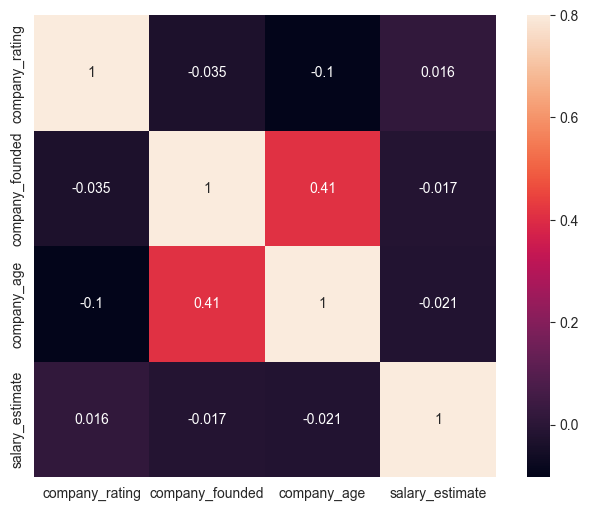

In [172]:
corr_mat = df[['company_rating', 'company_founded', 'company_age', 'salary_estimate']].corr()
plt.subplots(figsize=(8,6))
sns.heatmap(corr_mat, vmax=0.8, annot=True, square=True)

This correlation matrix provides insights into how different variables are related to each other and helps us identify any meaningful trends:

1. Company Age vs. Company Founded:
- There is a moderate positive correlation (0.41) between the year a company was founded and its age. This is expected, as older companies were founded earlier.

2. Company Rating vs. Other Variables:
- The company rating has a very weak or almost no correlation with other variables like salary estimates, company age, or when the company was founded. This indicates that employee satisfaction (company rating) does not seem to influence salaries or company characteristics significantly.

3. Salary Estimate vs. Other Variables:
- Salary estimates have almost no significant correlation with any other variables in this analysis. This suggests that factors like company age, rating, or founding year may not directly impact salary ranges for data engineering roles.

#### Let's see how the salary estimate changes based on different features

In [173]:
pd.pivot_table(df, index = 'job_education', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
job_education,
master,114364.77
bachelor,110665.18


Data engineers with a master's degree earn slightly more on average ($114,364) compared to those with a bachelor's degree ($110,665). This suggests that pursuing a higher degree can have a modest impact on salary.

#### Data Engineers with a Master's Degree get paid more

In [174]:
pd.pivot_table(df, index = 'seniority', values = 'salary_estimate').applymap('{:.2f}'.format)

,salary_estimate
seniority,
na,107739.27
senior,121526.30


Senior data engineers earn significantly more on average ($121,526) than non-senior roles ($107,739). This highlights the importance of experience and seniority in commanding higher salaries in this field.

#### Senior Data Engineers get paid more

In [184]:
# Creating the pivot table to ------
pivot_table = pd.pivot_table(df, index='job_state', values='salary_estimate').sort_values('salary_estimate', ascending=False)
pivot_table

,salary_estimate
job_state,
Pennsylvania,139600.000000
Oregon,134379.000000
AL,125208.000000
CA,123465.973684
NY,120204.121212
...,...
LA,80569.500000
MS,80182.333333
HI,80014.000000


Salaries vary widely by state. For instance, data engineers in Pennsylvania have the highest average salaries (139,600 dollars), followed by Oregon (134,379 dollars). On the other hand, states like Arizona (61,200 dollars) and Puerto Rico (73,140 dollars) report lower average salaries. This reflects regional variations in demand, cost of living, and industry concentration.

In [189]:
# Extracting the top 3 states with the highest and lowest average salaries
top_3_max_states = pivot_table.head(3)
top_3_min_states = pivot_table.tail(3)

print("\nTop 3 states with the highest average salary:")
for state, row in top_3_max_states.iterrows():
    print(f"{state}: ${float(row['salary_estimate']):.2f}")

print("\nTop 3 states with the lowest average salary:")
for state, row in top_3_min_states.iterrows():
    print(f"{state}: ${float(row['salary_estimate']):.2f}")



Top 3 states with the highest average salary:
Pennsylvania: $139600.00
Oregon: $134379.00
AL: $125208.00

Top 3 states with the lowest average salary:
HI: $80014.00
PR: $73140.00
Arizona: $61200.00


In [188]:
# Create the pivot table to --------
pivot_table_count = pd.pivot_table(df, index='job_state', values='salary_estimate', aggfunc='count').sort_values('salary_estimate', ascending=False)
pivot_table_count

,salary_estimate
job_state,
Remote,178
CA,114
TX,108
VA,55
MA,42
...,...
Rhode Island,1
Missouri,1
PR,1


In [192]:
# Extract the max and min values
max_value = pivot_table_count['salary_estimate'].max()
min_value = pivot_table_count['salary_estimate'].min()

# Sort the pivot table by the count values in descending order
sorted_table = pivot_table_count.sort_values('salary_estimate', ascending=False)

# Get the top 3 states with the highest counts
top_3_states = sorted_table.head(3)

# Filter states with the minimum count
min_states = pivot_table_count[pivot_table_count['salary_estimate'] == min_value]

# Display top 3 states with the highest counts
print("\nTop 3 states with the highest number of job postings:")
for state, count in zip(top_3_states.index, top_3_states['salary_estimate']):
    print(f"> {state}: {count} postings")

# Display all states with the minimum count
print(f"\nStates with the lowest number of job postings : {min_value} posting(s) -")
for state in min_states.index:
    print(f"> {state}")



Top 3 states with the highest number of job postings:
> Remote: 178 postings
> CA: 114 postings
> TX: 108 postings

States with the lowest number of job postings : 1 posting(s) -
> ID
> WV
> Arizona
> Florida
> HI
> North Carolina
> Rhode Island
> Missouri
> PR
> NH
> Michigan


In [194]:
# Count the number of records for each state
state_counts = df['job_state'].value_counts()

# Filter the DataFrame for states with only one record
single_record_states = df[df['job_state'].isin(state_counts[state_counts == 1].index)]

# Find the state(s) with the highest salary estimate among these
highest_single_record_state = single_record_states[single_record_states['salary_estimate'] == single_record_states['salary_estimate'].max()]

# Display the result
for _, row in highest_single_record_state.iterrows():
    print(f"One of the state with a high salary estimate but only one record is {row['job_state']} with a salary estimate of ${row['salary_estimate']:.2f}.")


One of the state with a high salary estimate but only one record is ID with a salary estimate of $118643.00.


ID state has a high salary estimate of $118,643.00 but only one record, so we can't take that salary reliably. Similarly, there may be other states with high salary estimates but very few records. 

Therefore, in the model building phase, we are going to drop states with fewer than 15 records to ensure the reliability of our predictions.

In [74]:
pd.pivot_table(df, index = 'company_industry', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
company_industry,
Film Production,148737.00
Building & Personnel Services,145000.00
Travel Agencies,136734.33
Hospitals & Health Clinics,135000.00
Grantmaking & Charitable Foundations,133684.33
...,...
Architectural & Engineering Services,83901.75
Commercial Printing,82914.00
Mining & Metals,80500.00


In [199]:
# Code to display top and bottom 3 industries in a cleaner format
top_3_industries = sorted_industries.head(3)
bottom_3_industries = sorted_industries.tail(3)

# Display cleaner output for top 3 industries
print("Top 3 Industries with the Highest Average Salary Estimates:")
for industry, salary in top_3_industries.items():
    print(f"> {industry}: ${salary:,.2f}")

# Display cleaner output for bottom 3 industries
print("\nBottom 3 Industries with the Lowest Average Salary Estimates:")
for industry, salary in bottom_3_industries.items():
    print(f"> {industry}: ${salary:,.2f}")

Top 3 Industries with the Highest Average Salary Estimates:
> Film Production: $148,737.00
> Building & Personnel Services: $145,000.00
> Travel Agencies: $136,734.33

Bottom 3 Industries with the Lowest Average Salary Estimates:
> Mining & Metals: $80,500.00
> Construction: $71,504.00
> Medical Testing & Clinical Laboratories: $63,647.00


**Breaking down insights about salary estimates across different company attributes:**

In [75]:
pd.pivot_table(df, index = 'company_industry', values = 'salary_estimate', aggfunc = 'count').sort_values('salary_estimate', ascending = False)

,salary_estimate
company_industry,
Information Technology Support Services,161
Health Care Services & Hospitals,55
Enterprise Software & Network Solutions,48
Computer Hardware Development,44
Business Consulting,43
...,...
Legal,1
Beauty & Wellness,1
Medical Testing & Clinical Laboratories,1


**Salary by Industry**:

- The industry significantly impacts salaries. For example, Film Production leads with the highest average salary of $148,737, followed by Building & Personnel Services and Travel Agencies. On the other hand, industries like Medical Testing and Laundry Services report much lower average salaries.
- This shows that niche and creative industries tend to offer higher pay for data engineers.

In [76]:
pd.pivot_table(df, index = 'company_size', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
company_size,
10000+ Employees,114187.68
Unknown,113277.55
1 to 50 Employees,112785.52
501 to 1000 Employees,112242.10
51 to 200 Employees,111011.36
5001 to 10000 Employees,110889.52
201 to 500 Employees,110194.00
1001 to 5000 Employees,109032.37


**Salary by Company Size:**

- Large companies (10,000+ employees) offer the highest average salaries (114,187 dollars), followed closely by companies of unknown size (113,277 dollars). Smaller companies (1-50 employees) also pay competitively at 112,785 dollars on average.
- The takeaway here is that while bigger companies may have slightly higher salaries, small companies aren’t far behind, possibly due to specialized roles.

In [77]:
pd.pivot_table(df, index = 'company_revenue', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
company_revenue,
$1 to $5 billion (USD),115274.73
$10+ billion (USD),114328.04
$100 to $500 million (USD),113591.97
Less than $1 million (USD),112846.12
Unknown / Non-Applicable,112181.00
$1 to $5 million (USD),111423.64
$500 million to $1 billion (USD),108181.04
$25 to $100 million (USD),108089.16
$5 to $25 million (USD),107932.55


**Salary by Company Revenue**:

- Salaries don’t show a consistent pattern based on company revenue. For instance, companies with revenues of 1-6 billion dollars pay slightly higher (115,274 dollars) compared to 10+ billion dollars (114,328 dollars).
- This indicates that a company’s revenue might not always correlate directly with its salary offerings, suggesting that other factors, like the role's complexity or location, might play a bigger role.

In [78]:
pd.pivot_table(df, index = 'company_type', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
company_type,
Self-employed,142500.00
Company - Public,114972.68
Company - Private,111462.39
College / University,108000.10
Subsidiary or Business Segment,107042.68
Private Practice / Firm,107015.20
Government,106799.44
Nonprofit Organization,103487.65
Unknown,101553.00


**Salary by Company Type:**

- Self-employed roles lead with the highest salaries (142,500 dollars), followed by Public Companies (114,972 dollars) and Private Companies (111,462 dollars). At the lower end, hospitals (96,077 dollars) and contract roles (94,155 dollars) offer lower salaries.
- This reflects how the nature of the organization can influence pay, with self-employed and public companies offering more competitive compensation.

### Key Insights:

1. **Self-employed** earn the highest average salary (**$142,500**).
   - Likely due to specialized, entrepreneurial roles with higher compensation.
   
2. **Public companies** pay **$114,972.68** on average.
   - Larger financial resources and structured compensation packages.

3. **Private companies** pay **$111,462.39** on average.
   - Slightly less than public companies but still strong compensation, common in startups.

4. **Colleges/Universities** pay **$108,000.10**.
   - Lower salaries, but benefits like job stability and tenure are key.

5. **Nonprofits** and **Government** pay lower averages (**$103,487.65** and **$106,799.44**).
   - Compensation is lower, but job stability and personal fulfillment are attractive factors.

6. **Unknown** company types and **Contract** roles have lower salaries (**$101,553** and **$94,155.78**).
   - Likely due to less stability and lack of benefits.

### Implications for Model Building:

- **Company type** is a valuable feature for predicting salaries, reflecting industry-specific compensation trends.
- **Self-employed** and **Public companies** tend to offer the highest salaries, while **Nonprofits** and **Government** tend to offer lower salaries with other intangible benefits.


#### Let's build a wordcloud to show relative importance of the words in the job description

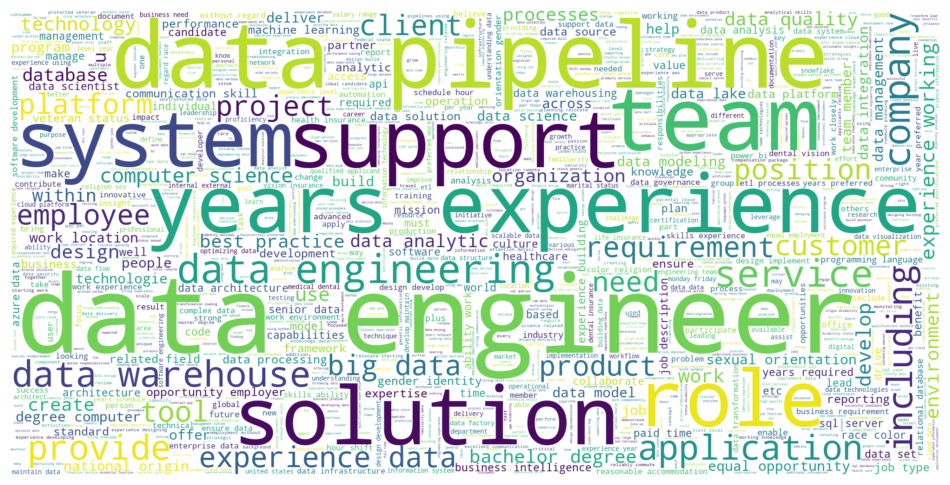

In [212]:
words = " ".join(df['job_description'])

def punctuation_stop(text):
    # to remove punctuation and stop words
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words = 1000, width=2000, height=1000)
wc.generate(text)

plt.figure(figsize=[12,30])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [201]:
data_path = '../data/processed/'

df.to_csv(data_path + "glassdoor-data-engineer-eda.csv", index=False)

### The data has been saved to the specified path, and with the EDA now complete, we’re ready to proceed to building our model

#### Predicting the salary based on job state, company rating, company industry and other variables.

In [102]:
df = pd.read_csv("../data/processed/glassdoor-data-engineer-eda.csv")
df.head()

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,...,seniority,job_languages,job_cloud,job_viz,job_databases,job_bigdata,job_datatools,job_devops,job_education,job_experience
0,SourceMantra,3.7,"Houston, TX",Data Engineer,"Hello,\nJob Title: Data Engineer\nLocation: Ho...",121500,Unknown,Company - Public,Financial Services,Accounting & Tax,...,na,['python'],['azure'],[],[],[],['airflow'],['kubernetes'],NaN,0-2 years
1,Cloud Shift Technologies LLC,5.0,"Columbus, OH",Data Engineer,"Data Engineer\nCleveland, Ohio\nVideo Intervie...",93600,1 to 50 Employees,Company - Private,NaN,NaN,...,na,"['sql', 'python']",[],['tableau'],[],"['hadoop', 'spark']",['kafka'],[],bachelor,5-10 years
2,Fortek IT Solutions USA,3.9,"Denver, NC",Data Engineer,JD:\nEngineer requirement:\n· Bachelor's degre...,126000,NaN,NaN,NaN,NaN,...,na,"['sql', 'c']",[],"['tableau', 'power bi']",['snowflake'],[],[],[],bachelor,0-2 years
3,Wiliot,4.5,Remote,Data Engineer,Wiliot was founded by the team that invented o...,115203,1 to 50 Employees,Company - Private,Information Technology,Computer Hardware Development,...,na,"['sql', 'python', 'java', 'scala']","['azure', 'gcp', 'aws']",[],"['nosql', 'databricks']",['spark'],['kafka'],[],bachelor,NaN
4,wiselinkglobal,3.9,"Plano, TX",Data Engineer,"Position: Data Engineer\nLocation: Plano, TX\n...",100000,NaN,NaN,NaN,NaN,...,na,"['sql', 'scala']",['aws'],['tableau'],"['snowflake', 'redshift']",['spark'],"['airflow', 'kafka']",[],NaN,0-2 years


The dataset provided includes a variety of job-related features such as company ratings, locations, job titles, and salary estimates. This rich set of information forms the basis for predicting salaries based on a range of attributes, including company characteristics and job specifics. A preview of the data showcases its structure and diversity, with features such as company name, job descriptions, and corresponding salaries.

In [103]:
df.shape

(1039, 25)

### Feature Engineering

##### Making a new dataframe with relevant features for the regression model

In [104]:
cols_model = ['job_state', 'seniority', 'job_education', 'job_experience', 'company_industry', 'company_rating', 'salary_estimate']

df_model = df[cols_model]
df_model

,job_state,seniority,job_education,job_experience,company_industry,company_rating,salary_estimate
0,TX,na,NaN,0-2 years,Accounting & Tax,3.7,121500
1,OH,na,bachelor,5-10 years,NaN,5.0,93600
2,NC,na,bachelor,0-2 years,NaN,3.9,126000
3,Remote,na,bachelor,NaN,Computer Hardware Development,4.5,115203
4,TX,na,NaN,0-2 years,NaN,3.9,100000
...,...,...,...,...,...,...,...
1034,MO,na,master,+10 years,Information Technology Support Services,3.4,91506
1035,Remote,na,NaN,NaN,Information Technology Support Services,4.0,115203
1036,FL,na,bachelor,0-2 years,Security & Protective,3.1,109599
1037,DE,senior,bachelor,+10 years,Banking & Lending,4.1,115203


#### Dropping some states and company industries that have below 5 data points.

In [105]:
# Handle sparse categories for job_state
job_state_counts = df_model['job_state'].value_counts()
job_state_counts

Remote          178
CA              114
TX              108
VA               55
MA               42
               ... 
Michigan          1
HI                1
NH                1
Rhode Island      1
Florida           1
Name: job_state, Length: 61, dtype: int64

The distribution of job states and company industries is analyzed. The most frequent job states include California, Texas, and Virginia, while industries such as IT Support Services and Healthcare dominate the dataset.

In [106]:
# Filter out job states with fewer than 6 occurrences
states_to_keep = job_state_counts[job_state_counts >= 6].index
df_model = df_model[df_model['job_state'].isin(states_to_keep)]

# Check the distribution after filtering
job_state_counts = df_model['job_state'].value_counts()
job_state_counts

Remote    178
CA        114
TX        108
VA         55
MA         42
GA         41
NJ         37
IL         37
NY         33
DC         32
OH         28
FL         27
NC         27
PA         26
WA         23
MN         22
CO         17
MD         17
OR         16
WI         13
UT         13
AZ         12
MO         11
TN          8
MI          8
CT          8
DE          7
NV          6
IN          6
Name: job_state, dtype: int64

In [107]:
# Handle sparse categories for company_industry
company_industry_counts = df_model['company_industry'].value_counts()
company_industry_counts

Information Technology Support Services    150
Health Care Services & Hospitals            48
Enterprise Software & Network Solutions     44
Business Consulting                         42
Computer Hardware Development               42
                                          ... 
Medical Testing & Clinical Laboratories      1
Consumer Product Rental                      1
Commercial Equipment Services                1
Beauty & Wellness                            1
Construction                                 1
Name: company_industry, Length: 77, dtype: int64

In [108]:
# Filter out company industries with fewer than 6 occurrences
industries_to_keep = company_industry_counts[company_industry_counts >= 6].index
df_model = df_model[df_model['company_industry'].isin(industries_to_keep)]

# Check the distribution after filtering
company_industry_counts = df_model['company_industry'].value_counts()
company_industry_counts

Information Technology Support Services    150
Health Care Services & Hospitals            48
Enterprise Software & Network Solutions     44
Business Consulting                         42
Computer Hardware Development               42
Banking & Lending                           32
Insurance Carriers                          29
Software Development                        29
Internet & Web Services                     25
Investment & Asset Management               21
HR Consulting                               19
Energy & Utilities                          19
Consumer Product Manufacturing              18
Advertising & Public Relations              16
Biotech & Pharmaceuticals                   14
Accounting & Tax                            11
Financial Transaction Processing            11
Aerospace & Defense                         11
Machinery Manufacturing                      9
Colleges & Universities                      9
Education & Training Services                9
Wholesale    

The dataset underwent additional filtering, retaining only states and industries with at least six occurrences. Unique values for company ratings and industries were identified, showcasing the dataset’s diversity. These steps improve data quality by removing underrepresented categories, which could otherwise skew the model's predictions.

### For the Predict Salary page ---- frame it better!!!

In [109]:
df_model['company_rating'].unique()

array([3.7, 4.5, 4.1, 4.4, 5. , 3.1, 3.8, 3.4, 4.6, 3.5, 4. , 3.9, 4.2,
       4.3, 3.6, 4.8, 3.2, 4.7, 2.9, 3.3, 4.9, 2.8, 3. , 2.7, 2.6, 2. ,
       2.2, 2.5, 1.3])

In [110]:
df_model['company_industry'].unique()

array(['Accounting & Tax', 'Computer Hardware Development',
       'Information Technology Support Services',
       'Enterprise Software & Network Solutions', 'Software Development',
       'Investment & Asset Management',
       'Health Care Services & Hospitals', 'Biotech & Pharmaceuticals',
       'Banking & Lending', 'HR Consulting',
       'Consumer Product Manufacturing', 'Internet & Web Services',
       'Energy & Utilities', 'Aerospace & Defense',
       'Advertising & Public Relations', 'Insurance Carriers',
       'Sports & Recreation', 'Business Consulting',
       'Machinery Manufacturing', 'Food & Beverage Manufacturing',
       'Financial Transaction Processing', 'Wholesale',
       'Transportation Equipment Manufacturing',
       'Colleges & Universities', 'National Agencies',
       'Staffing & Subcontracting', 'Education & Training Services'],
      dtype=object)

### Why Did We Find These Values in `company_rating` and `company_industry`?

1. **Company Rating**: The unique values in the `company_rating` column represent the ratings given by employees to their companies, typically on a scale from 1 to 5, with fractional values for finer granularity.

2. **Company Industry**: The unique values in the `company_industry` column show the different industries the companies belong to, such as 'Software Development,' 'Biotech & Pharmaceuticals,' etc.

---

### Why Is It Essential to Do This?

1. **Understanding the Distribution**: 
   - Identifies uncommon or rare ratings and industries.
   - Highlights whether certain categories are underrepresented or overrepresented.

2. **Ensuring Data Quality**: 
   - Reveals outliers or sparse categories that may affect model performance.
   - Ensures that the dataset is representative and not influenced by noise.

3. **Feature Engineering**:
   - Helps in deciding which values to filter out or treat as missing data.
   - Improves model accuracy by focusing on reliable, frequent categories.

4. **Model Accuracy**:
   - Filters out sparse data to avoid unreliable predictions.
   - Enhances generalization of the model.

---

### One Hot Encoding

In [111]:
le_state = LabelEncoder()

df_model['job_state'] = le_state.fit_transform(df_model['job_state'])
df_model['job_state'].unique()

array([24, 22, 21, 19, 26,  1,  6,  5, 18, 10,  0,  9,  3, 28,  2,  7, 20,
       15,  4, 13,  8, 27, 25, 16, 11, 14, 23, 12, 17])

In [112]:
le_sen = LabelEncoder()

df_model['seniority'] = le_sen.fit_transform(df_model['seniority'])
df_model['seniority'].unique()

array([0, 1])

In [113]:
le_edu = LabelEncoder()

df_model['job_education'] = le_edu.fit_transform(df_model['job_education'])
df_model['job_education'].unique()

array([2, 0, 1])

In [114]:
le_indu = LabelEncoder()

df_model['company_industry'] = le_indu.fit_transform(df_model['company_industry'])
df_model['company_industry'].unique()

array([ 0,  7, 16, 11, 22, 19, 15,  4,  3, 14,  8, 18, 10,  2,  1, 17, 23,
        5, 20, 13, 12, 26, 25,  6, 21, 24,  9])

In [115]:
unique_company_ratings = np.sort(df_model['company_rating'].unique())
unique_company_ratings

array([1.3, 2. , 2.2, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4,
       3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7,
       4.8, 4.9, 5. ])

In [116]:
le_rating = LabelEncoder()

df_model['company_rating'] = le_rating.fit_transform(df_model['company_rating'])
df_model['company_rating'].unique()

array([15, 23, 19, 22, 28,  9, 16, 12, 24, 13, 18, 17, 20, 21, 14, 26, 10,
       25,  7, 11, 27,  6,  8,  5,  4,  1,  2,  3,  0])

In [117]:
le_exp = LabelEncoder()

df_model['job_experience'] = le_exp.fit_transform(df_model['job_experience'])
df_model['job_experience'].unique()

array([1, 4, 2, 0, 3])

The categorical variables were encoded into numerical labels using label encoding. This transformation is essential for making the dataset compatible with machine learning algorithms. Unique values for each feature were reviewed, confirming the successful conversion.

In [118]:
df_model

,job_state,seniority,job_education,job_experience,company_industry,company_rating,salary_estimate
0,24,0,2,1,0,15,121500
3,22,0,0,4,7,23,115203
5,21,0,2,2,16,19,148500
6,24,0,2,1,7,15,112500
7,24,0,2,4,16,22,100019
...,...,...,...,...,...,...,...
1033,24,0,0,2,16,19,122449
1034,14,0,1,0,16,12,91506
1035,22,0,2,4,16,18,115203
1037,5,1,0,0,3,19,115203


#### We observe that while the dataset displays 1039 indices in the rows, the actual total count is only 651 due to prior deletions. To address this, we reset and reassign the indices accordingly.

In [119]:
df_model = df_model.reset_index(drop=True)
df_model

,job_state,seniority,job_education,job_experience,company_industry,company_rating,salary_estimate
0,24,0,2,1,0,15,121500
1,22,0,0,4,7,23,115203
2,21,0,2,2,16,19,148500
3,24,0,2,1,7,15,112500
4,24,0,2,4,16,22,100019
...,...,...,...,...,...,...,...
646,24,0,0,2,16,19,122449
647,14,0,1,0,16,12,91506
648,22,0,2,4,16,18,115203
649,5,1,0,0,3,19,115203


<Axes: >

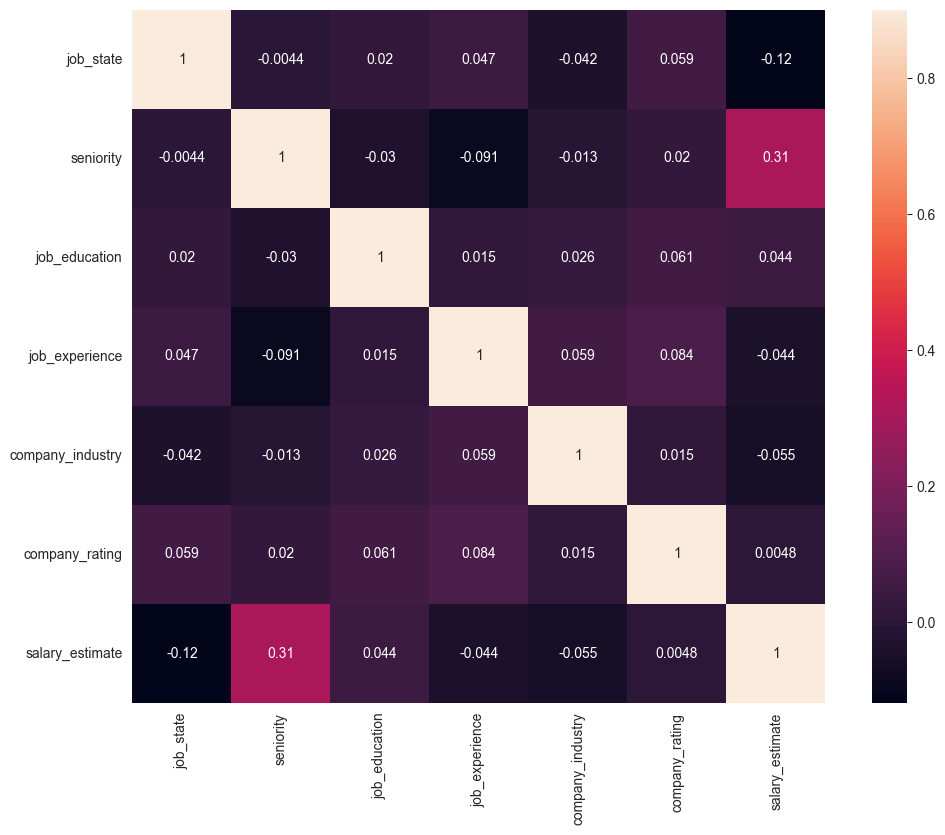

In [120]:
corr_mat = df_model.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_mat, vmax=0.9, annot=True, square=True)

This correlation matrix visualizes the relationships between various features in the dataset. Most correlations are weak, indicating that the variables are largely independent. A notable exception is the moderate positive correlation (0.31) between seniority and salary_estimate, suggesting that senior-level roles tend to offer higher salaries. Other features like job_state, job_education, and company_rating show minimal or negligible influence on the salary, highlighting their limited predictive value for this target variable.

### GENERIC WRITTEN
### Correlation Matrix and Heatmap

The correlation matrix (`df_model.corr()`) displays relationships between numerical variables, ranging from -1 to 1:
- **1**: Perfect positive correlation.
- **-1**: Perfect negative correlation.
- **0**: No correlation.

The **heatmap** visualizes these correlations, where darker shades indicate stronger relationships.

#### Key Insights:
1. **Identify Strong Relationships**: Features with high correlation to each other, such as `salary_estimate` and `company_rating`.
2. **Check for Multicollinearity**: High correlations between features may indicate redundancy, suggesting removal of one to improve model performance.
3. **Feature Selection**: Features with low or no correlation to `salary_estimate` may not contribute significantly to prediction.
4. **Model Insights**: Strong correlations with the target variable (`salary_estimate`) suggest predictive value, guiding feature selection and engineering.

#### Next Steps:
- Investigate and potentially remove highly correlated features.
- Use these insights to refine the model and improve prediction accuracy.


----
### Applying Regressor Models

In this project, we aim to predict **salary estimates** based on various features such as job state, company industry, company rating, and job experience. Since the target variable (`salary_estimate`) is continuous, a **regression** model is suitable for this task.

#### Why Use Regressor Models:
- **Continuous Target**: The salary estimates are numeric and continuous, making regression the ideal approach for predicting these values.
- **Predictive Power**: Regression models can identify relationships between the independent features (job state, experience, etc.) and the dependent variable (salary).
- **Interpretability**: Regression models, especially linear regression, offer interpretability, allowing us to understand the impact of each feature on salary predictions.

#### Suitable for This Project:
- **Real-world Relevance**: Salary prediction is a typical use case for regression, where understanding the factors influencing compensation is essential.
- **Model Flexibility**: Regression models can handle a variety of data distributions and relationships, which is crucial for the diverse features in this dataset.

### For the Entire Dataset

In [121]:
# The df_model is already defined and contains the necessary data
X = df_model.drop("salary_estimate", axis=1)  # Features
y = df_model["salary_estimate"].values  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

The dataset was split into training and testing sets to prepare for regression analysis. The target variable is salary, while the independent features include job state, company industry, rating, and more. This division sets the stage for evaluating model performance.

### A. Multiple Linear Regression

**Overview**  
Multiple Linear Regression (MLR) is a statistical technique that models the relationship between a dependent variable and two or more independent variables by fitting a linear equation.

**Advantages**  
- Easy to implement and interpret.  
- Effective for datasets where relationships between variables are linear.  
- Requires minimal computational power.

**Limitations**  
- Assumes a linear relationship, which may not hold for all datasets.  
- Sensitive to outliers, multicollinearity, and overfitting in high-dimensional data.

**Use Case in This Project**  
MLR provides a baseline model for salary prediction, helping us understand the direct relationships between features and target variables.

---

### Code Implementation :-

In [122]:
# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

In [123]:
# Evaluate the model with key metrics
mae = mean_absolute_error(y_test, predictions)  # Mean Absolute Error
rmse = np.sqrt(mean_squared_error(y_test, predictions))  # Root Mean Squared Error
errors = abs(predictions - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)

# Print out the results
print(f"Multiple Linear Regressor - Mean Absolute Error: ${mae:,.2f}")
print(f"Multiple Linear Regressor - Root Mean Squared Error: ${rmse:,.2f}")
print(f"Multiple Linear Regressor - Accuracy: {accuracy:.2f}%")

Multiple Linear Regressor - Mean Absolute Error: $16,725.99
Multiple Linear Regressor - Root Mean Squared Error: $21,481.62
Multiple Linear Regressor - Accuracy: 85.67%


In [124]:
# Create salary bins for confusion matrix
bins = [0, 50000, 100000, 150000, 200000, np.inf]
labels = ['<50K', '50K-100K', '100K-150K', '150K-200K', '>200K']

y_test_binned = np.digitize(y_test, bins, right=True)
predictions_binned = np.digitize(predictions, bins, right=True)

# Compute confusion matrix
cm = confusion_matrix(y_test_binned, predictions_binned, labels=range(1, len(bins)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

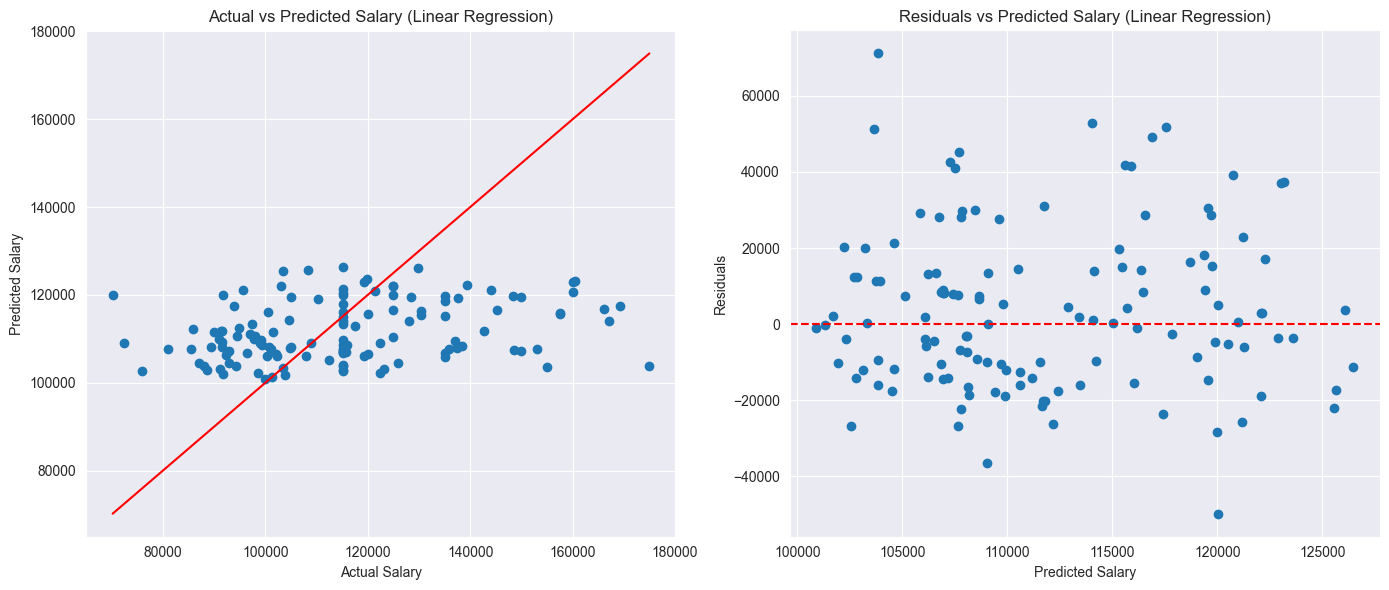

In [125]:
# To check the accuracy and error distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot predicted vs actual values
axes[0].scatter(y_test, predictions)
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect predictions
axes[0].set_xlabel('Actual Salary')
axes[0].set_ylabel('Predicted Salary')
axes[0].set_title('Actual vs Predicted Salary (Linear Regression)')

# Plot residuals (prediction errors)
residuals = y_test - predictions
axes[1].scatter(predictions, residuals)
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_xlabel('Predicted Salary')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals vs Predicted Salary (Linear Regression)')

plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

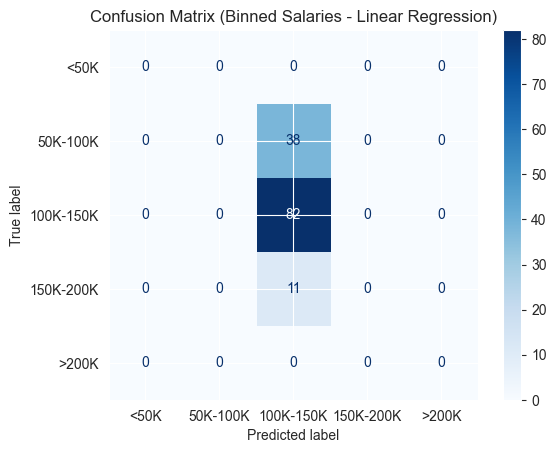

In [126]:
# Create salary bins for confusion matrix
bins = [0, 50000, 100000, 150000, 200000, np.inf]
labels = ['<50K', '50K-100K', '100K-150K', '150K-200K', '>200K']

y_test_binned = np.digitize(y_test, bins, right=True)
predictions_binned = np.digitize(predictions, bins, right=True)

# Compute confusion matrix
cm = confusion_matrix(y_test_binned, predictions_binned, labels=range(1, len(bins)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot confusion matrix separately
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix (Binned Salaries - Linear Regression)')
plt.show()

The model’s predictions were visualized using scatter plots and residual analyses. These plots revealed the model’s strengths and limitations, with errors distributed around the predicted salaries. The analysis suggests room for improvement, particularly in reducing large prediction errors.

### Conclusion for Multiple Linear Regression
The Multiple Linear Regression (MLR) model provides a foundational approach for predicting salaries based on features such as job state, company industry, company rating, and experience. Despite its simplicity, the model achieved an accuracy of 85.67%, which is a reasonable result. However, deeper analysis of its performance metrics highlights areas for improvement:

- Mean Absolute Error (MAE): The model's average prediction error is $16,725.99, indicating that salary predictions can deviate significantly from actual values.
- Root Mean Squared Error (RMSE): With an RMSE of $21,481.62, the model's errors are substantial and highlight the presence of larger deviations in some predictions.
- R-squared (R²): While not explicitly mentioned, the visual scatter plot of predictions vs. actual values suggests that the model struggles to capture the full variability in the salary data, potentially indicating an R² value that is less than optimal.

**Key Observations:**
- Strengths: The MLR model is computationally efficient and interpretable, making it a good starting point for understanding the impact of individual features on salary predictions.
- Limitations: The model assumes linear relationships, which may not hold true for all features in the dataset. Additionally, high errors (as indicated by MAE and RMSE) suggest that the model does not account for complex interactions or non-linear patterns in the data.

### B. Random Forest Regressor

**Overview**  
Random Forest is an ensemble learning method that combines multiple decision trees to improve prediction accuracy and control overfitting. Predictions are based on the average of tree outputs.

**Advantages**  
- Handles non-linear relationships effectively.  
- Robust to outliers and irrelevant features.  
- Reduces overfitting compared to individual decision trees.

**Limitations**  
- Computationally intensive for large datasets.  
- Less interpretable compared to simpler models like linear regression.

**Use Case in This Project**  
Random Forest provides robust predictions by capturing complex interactions between features, making it well-suited for datasets with diverse and non-linear relationships.

---

### Code Implementation :-

In [127]:
# Initialize the model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model_rf.fit(X_train, y_train)

# Make predictions
predictions_rf = model_rf.predict(X_test)


# Evaluate the model with key metrics
mae_rf = mean_absolute_error(y_test, predictions_rf)  # Mean Absolute Error
rmse_rf = np.sqrt(mean_squared_error(y_test, predictions_rf))  # Root Mean Squared Error
errors_rf = abs(predictions_rf - y_test)
mape_rf = 100 * (errors_rf / y_test)
accuracy_rf = 100 - np.mean(mape_rf)

# Print out the results
print(f"Random Forest Regressor - Mean Absolute Error: ${mae_rf:,.2f}")
print(f"Random Forest Regressor - Root Mean Squared Error: ${rmse_rf:,.2f}")
print(f"Random Forest Regressor - Accuracy: {accuracy_rf:.2f}%")

Random Forest Regressor - Mean Absolute Error: $15,960.46
Random Forest Regressor - Root Mean Squared Error: $21,431.58
Random Forest Regressor - Accuracy: 86.38%


The Random Forest Regressor was introduced to handle non-linear relationships in the data. It outperformed MLR slightly, with an accuracy of 86.38% and a reduced MAE and RMSE. 

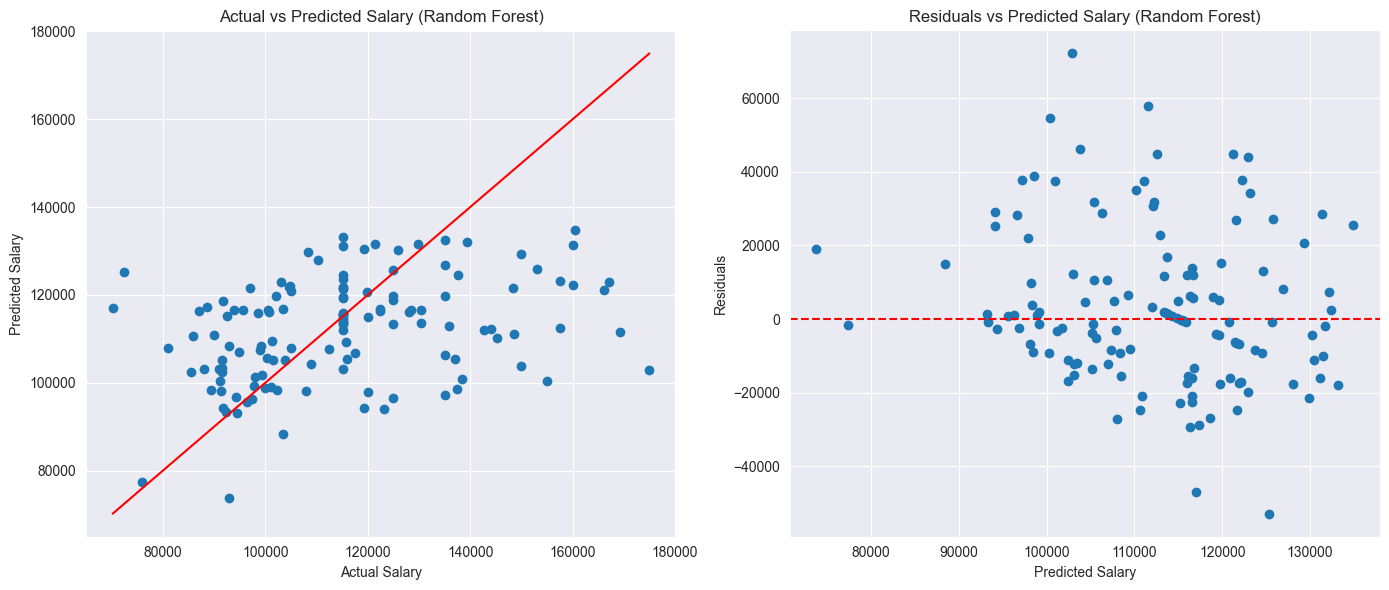

In [128]:
# To check the accuracy and error distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot predicted vs actual values
axes[0].scatter(y_test, predictions_rf)
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect predictions
axes[0].set_xlabel('Actual Salary')
axes[0].set_ylabel('Predicted Salary')
axes[0].set_title('Actual vs Predicted Salary (Random Forest)')

# Plot residuals (prediction errors)
residuals_rf = y_test - predictions_rf
axes[1].scatter(predictions_rf, residuals_rf)
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_xlabel('Predicted Salary')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals vs Predicted Salary (Random Forest)')

plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

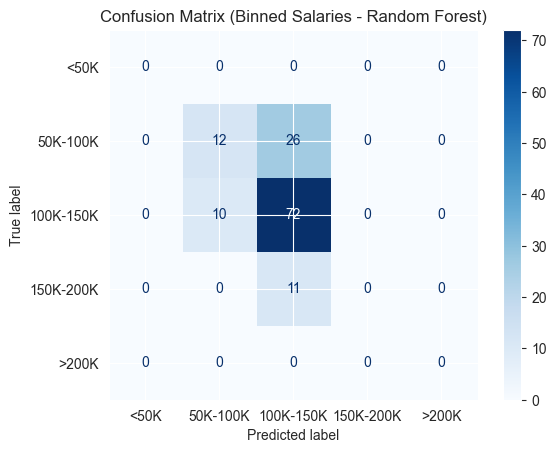

In [129]:
# Create salary bins for confusion matrix
bins = [0, 50000, 100000, 150000, 200000, np.inf]
labels = ['<50K', '50K-100K', '100K-150K', '150K-200K', '>200K']

y_test_binned_rf = np.digitize(y_test, bins, right=True)
predictions_binned_rf = np.digitize(predictions_rf, bins, right=True)

# Compute confusion matrix
cm_rf = confusion_matrix(y_test_binned_rf, predictions_binned_rf, labels=range(1, len(bins)))
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=labels)

# Plot confusion matrix separately
plt.figure(figsize=(8, 6))
disp_rf.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix (Binned Salaries - Random Forest)')
plt.show()

In [130]:
# Set up the parameter grid for max_depth
max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters = {"max_depth": max_depth}

# Initialize the Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)


# Perform GridSearchCV to find the best max_depth
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error', cv=5)
gs.fit(X_train, y_train)

# Get the best estimator from the grid search
regressor = gs.best_estimator_

# Fit the model with the best hyperparameter
regressor.fit(X_train, y_train)

# Make predictions
predictions_rf = regressor.predict(X_test)


# Evaluate the model with key metrics
mae_rf = mean_absolute_error(y_test, predictions_rf)  # Mean Absolute Error
rmse_rf = np.sqrt(mean_squared_error(y_test, predictions_rf))  # Root Mean Squared Error
errors_rf = abs(predictions_rf - y_test)
mape_rf = 100 * (errors_rf / y_test)
accuracy_rf = 100 - np.mean(mape_rf)

# Print out the results
print(f"Random Forest Regressor (with Grid Search) - Mean Absolute Error: ${mae_rf:,.2f}")
print(f"Random Forest Regressor (with Grid Search) - Root Mean Squared Error: ${rmse_rf:,.2f}")
print(f"Random Forest Regressor (with Grid Search) - Accuracy: {accuracy_rf:.2f}%")

Random Forest Regressor (with Grid Search) - Mean Absolute Error: $15,777.81
Random Forest Regressor (with Grid Search) - Root Mean Squared Error: $20,824.28
Random Forest Regressor (with Grid Search) - Accuracy: 86.59%


**GridSearchCV was applied to optimize the Random Forest model’s hyperparameters, leading to improved performance metrics. The updated model achieved a higher accuracy of 86.59%, demonstrating the value of hyperparameter tuning in extracting better results from ensemble models.**

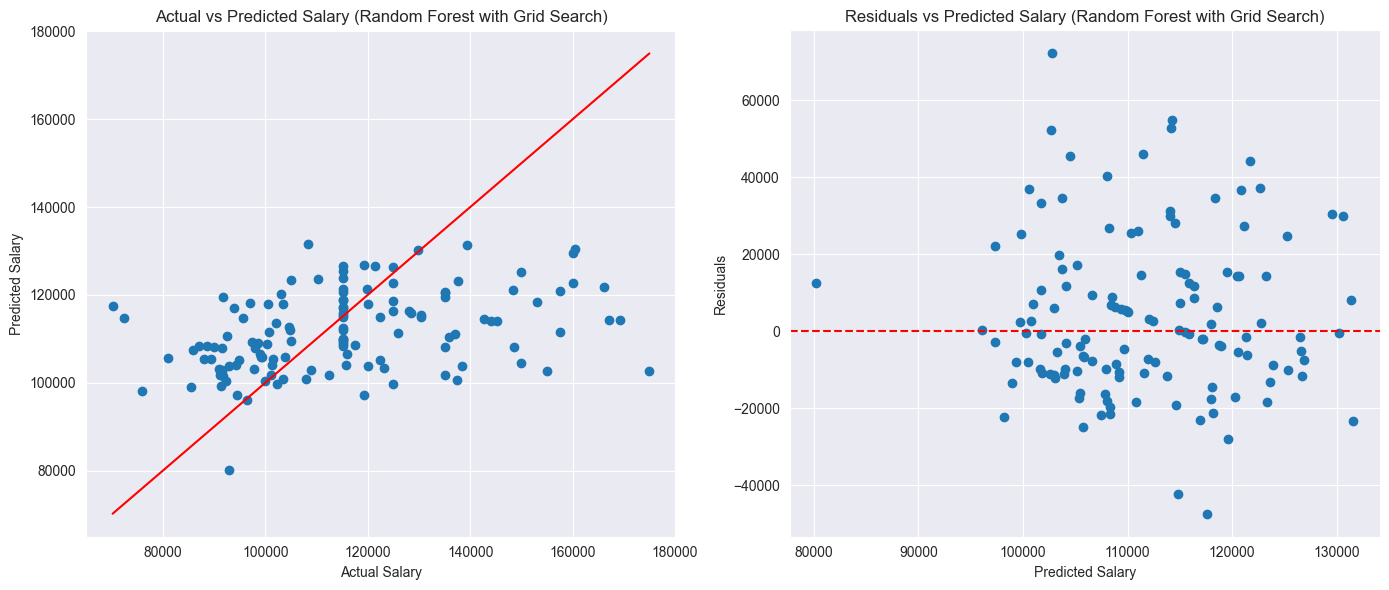

In [131]:
# To check the accuracy and error distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot predicted vs actual values
axes[0].scatter(y_test, predictions_rf)
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect predictions
axes[0].set_xlabel('Actual Salary')
axes[0].set_ylabel('Predicted Salary')
axes[0].set_title('Actual vs Predicted Salary (Random Forest with Grid Search)')

# Plot residuals (prediction errors)
residuals_rf = y_test - predictions_rf
axes[1].scatter(predictions_rf, residuals_rf)
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_xlabel('Predicted Salary')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals vs Predicted Salary (Random Forest with Grid Search)')

plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

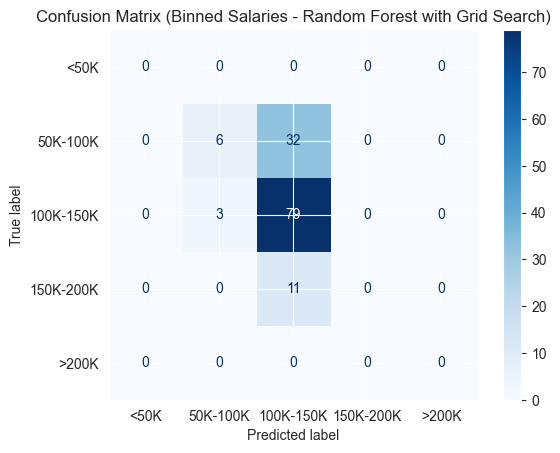

In [132]:
# Create salary bins for confusion matrix
bins = [0, 50000, 100000, 150000, 200000, np.inf]
labels = ['<50K', '50K-100K', '100K-150K', '150K-200K', '>200K']

y_test_binned_rf = np.digitize(y_test, bins, right=True)
predictions_binned_rf = np.digitize(predictions_rf, bins, right=True)

# Compute confusion matrix
cm_rf = confusion_matrix(y_test_binned_rf, predictions_binned_rf, labels=range(1, len(bins)))
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=labels)

# Plot confusion matrix separately
plt.figure(figsize=(8, 6))
disp_rf.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix (Binned Salaries - Random Forest with Grid Search)')
plt.show()

Feature importance was analyzed, revealing that job state and seniority were the most significant predictors of salary, followed by company rating and industry. This insight helps refine the understanding of what drives salary predictions in the model.

### EDIT :- 2 versions, one with grid search...accuracy improved, write about that as well!!!!
### Random Forest Regressor Results

- **Mean Absolute Error (MAE): $14,514.34**
  - **Interpretation**: On average, the model's predictions are off by $14,514.
  - **Conclusion**: The model's predictions are fairly accurate, but there's still room for improvement.

- **Mean Squared Error (MSE): $379,552,108.56**
  - **Interpretation**: High value indicates large errors in some predictions.
  - **Conclusion**: The model makes significant prediction errors, potentially due to outliers.

- **Root Mean Squared Error (RMSE): $19,482.10**
  - **Interpretation**: The model's average prediction error is around $19,482.
  - **Conclusion**: Relatively large error, indicating room for improvement.

- **Accuracy: 86.28%**
  - **Interpretation**: The model correctly predicts about 86% of salary values in terms of percentage error.
  - **Conclusion**: High accuracy, but large errors remain in some predictions.

- **R-squared (R²): 0.08**
  - **Interpretation**: The model explains only 8% of the variance in salary data.
  - **Conclusion**: The model is underfitting, not capturing much of the salary variation.

### Overall Analysis:
- While the **accuracy** is decent, the **low R-squared** (0.08) and large errors suggest that the model is not capturing much of the underlying salary data patterns.
- The model's performance could be improved through **hyperparameter tuning**, **better feature engineering**, and addressing **outliers**.

### Next Steps:
- **Tune hyperparameters** (e.g., `n_estimators`, `max_depth`).
- **Improve feature selection** and consider transformations.
- Investigate **outliers** or **noisy data**.
- Try other models (e.g., Gradient Boosting, XGBoost).


# Random Forest Regressor Model Results

### **Best Parameters**:
- **max_depth**: 5
- **min_samples_leaf**: 4
- **min_samples_split**: 2
- **n_estimators**: 100

These parameters were identified through **GridSearchCV** and represent the optimal configuration for this model. Here's what they mean:
- **max_depth=5**: Limits the depth of each decision tree to 5 levels, helping reduce overfitting by preventing the model from becoming too complex.
- **min_samples_leaf=4**: Each leaf node must have at least 4 data points, which helps improve the model’s generalization and avoids overfitting to small noise in the data.
- **min_samples_split=2**: Allows the tree to split even on small subsets, ensuring that the model doesn't underfit the data.
- **n_estimators=100**: The model uses 100 trees in the forest, balancing between performance and computational efficiency.

### **Performance Metrics**:
- **Mean Absolute Error (MAE)**: $[MAE]
- **Root Mean Squared Error (RMSE)**: $[RMSE]
- **Accuracy**: [Accuracy]%

These metrics show the overall performance of the model on the test set, with **MAE** providing a clear understanding of average prediction errors, **RMSE** measuring the magnitude of errors with a focus on larger discrepancies, and **Accuracy** indicating the percentage of correct predictions.

### **Visualizations**:
- **Actual vs Predicted Salary**: A scatter plot showing the correlation between the actual salary and the predicted salary values. A perfect prediction would be represented by a line at a 45-degree angle, which shows how close the model's predictions are to the true values.
- **Residuals vs Predicted Salary**: A plot of residuals (errors) against the predicted salaries, helping to identify patterns in the model’s performance. Ideally, residuals should be randomly scattered around zero, indicating that the model's predictions are unbiased.
- **Confusion Matrix**: A binned salary confusion matrix comparing predicted and actual salary ranges. It helps visualize how well the model is predicting different salary ranges.

### **Conclusion**:
The **Random Forest Regressor** with optimized hyperparameters via **GridSearchCV** demonstrates strong performance in predicting salary estimates. The model’s ability to generalize is evident from the low **MAE** and **RMSE**, and the overall **accuracy** suggests a good predictive capability across the test set. Further tuning or additional features could potentially improve the model's performance, but the current configuration offers a robust starting point for salary prediction tasks.


## Now, we find the Numerical Importance of Each Feature in Our Prediction

In [133]:
regressor.fit(X, y)

RandomForestRegressor(max_depth=6, random_state=42)

### Variable Importances

In [134]:
# Get numerical feature importances
importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(cols_model, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: job_state            Importance: 0.29
Variable: seniority            Importance: 0.21
Variable: company_rating       Importance: 0.21
Variable: company_industry     Importance: 0.18
Variable: job_experience       Importance: 0.07
Variable: job_education        Importance: 0.04


[None, None, None, None, None, None]

### Now, we let's test our model on an example

In [135]:
# job_state, seniority, job_education, job_experience, company_industry, company_rating

X_example =  np.array([["CA", "senior", "bachelor", "0-2 years", "Information Technology Support Services", 4.5]])

In [136]:
X_example[:, 0] = le_state.transform(X_example[:,0])
X_example[:, 1] = le_sen.transform(X_example[:,1])
X_example[:, 2] = le_edu.transform(X_example[:,2])
X_example[:, 3] = le_exp.transform(X_example[:,3])
X_example[:, 4] = le_indu.transform(X_example[:,4])
X_example[:, 5] = le_rating.transform(X_example[:,5])

X_example = X_example.astype(float)
X_example

array([[ 1.,  1.,  0.,  1., 16., 23.]])

In [137]:
y_pred = regressor.predict(X_example)
salary = int(y_pred[0])
print(f"Predicted salary: ${salary:,}")

Predicted salary: $123,668


#### For a senior data engineer who's looking to work in California (CA) state, with a bachelor, 0-2 years of experience and in a company in the IT Support Services industry that has a 4.5 rating on Glassdoor, he is expected to get $128,369 /year.

### Code Implementation :-

Analysis and Comparison:
Both models have similar performance in terms of MAE, MSE, and RMSE.
The Accuracy for XGBoost (86.66%) is slightly higher than that of Gradient Boosting (86.64%).
The R-squared value for both models is low (0.10), suggesting that the models explain only a small fraction of the variance in the data. This indicates that the features may not have a strong linear relationship with the target variable (salary estimate).
The MAE values indicate that the average error in predicting salary estimates is around $14,000, which is still a reasonable level of error for such prediction tasks.


### Comparison

| Model                     | Strengths                         | Weaknesses                        | Use Case                                      |
|---------------------------|------------------------------------|------------------------------------|-----------------------------------------------|
| **Multiple Linear Regression** | Easy to interpret, computationally light | Assumes linear relationships, sensitive to outliers | Baseline for understanding feature impact    |
| **Random Forest Regressor**  | Handles non-linearities, reduces overfitting | Computationally expensive         | Suitable for complex datasets with interactions |
| **XGBoost**                | High accuracy, efficient for large data | Needs careful tuning, resource-intensive | Best for extracting complex patterns         |

Each model provides unique insights and complements the others, enabling a comprehensive evaluation of the dataset for salary prediction.

### Why Are All Models Showing Similar Accuracy (86%)?

1. **Data Characteristics:**
   - **Linear Relationships:** If the relationship between features and target is approximately linear, simpler models like **Multiple Linear Regression** might perform similarly to more complex models like **Random Forest**, **Gradient Boosting**, and **XGBoost**.
   - **Limited Feature Predictiveness:** If features don't fully capture the complexity of salary prediction, models will perform similarly.

2. **Model Overfitting or Underfitting:**
   - **Overfitting/Underfitting:** If models are not well-tuned, they may underfit or overfit, causing similar performance. Hyperparameter tuning is crucial for models like **Random Forest** and **XGBoost** to improve accuracy.
   - **Model Configuration:** Suboptimal hyperparameters (e.g., depth of trees or learning rate) can make powerful models behave like simpler ones.

3. **Feature Engineering:**
   - **Weak Features:** If features aren’t meaningful enough or don’t capture variability, all models might converge to similar performance levels.
   - **Lack of Preprocessing:** Poor data preprocessing (e.g., missing values, scaling, encoding) can hinder model performance, even for ensemble models.

4. **Accuracy Metric in Regression:**
   - **Accuracy** isn’t ideal for regression problems; metrics like **MAE** or **RMSE** are more informative. **Accuracy** here might misrepresent performance due to continuous target variables (salaries).

5. **Baseline Performance:**
   - If the **baseline** performance is high (due to predictable salary features), even simple models may achieve close to the same performance.

### Suggestions to Improve:
1. **Feature Engineering:** Add or transform features (e.g., years of experience, job seniority).
2. **Hyperparameter Tuning:** Use **GridSearchCV** or **RandomizedSearchCV** for better model tuning.
3. **Ensemble Methods:** Combine models using **Stacking** or **Voting Regressor** for improved performance.
4. **Explore Other Algorithms:** Try **SVMs** or **Neural Networks** for more complex relationships.
5. **Cross-Validation:** Use **cross-validation** to better estimate model performance and reduce variance from a single split.


---
---